Analyse: Gian Stragiotti.csv et Karl Maeder.csv dans ../Data_Sailnjord/Straight_lines\06_06\06_06_Run1


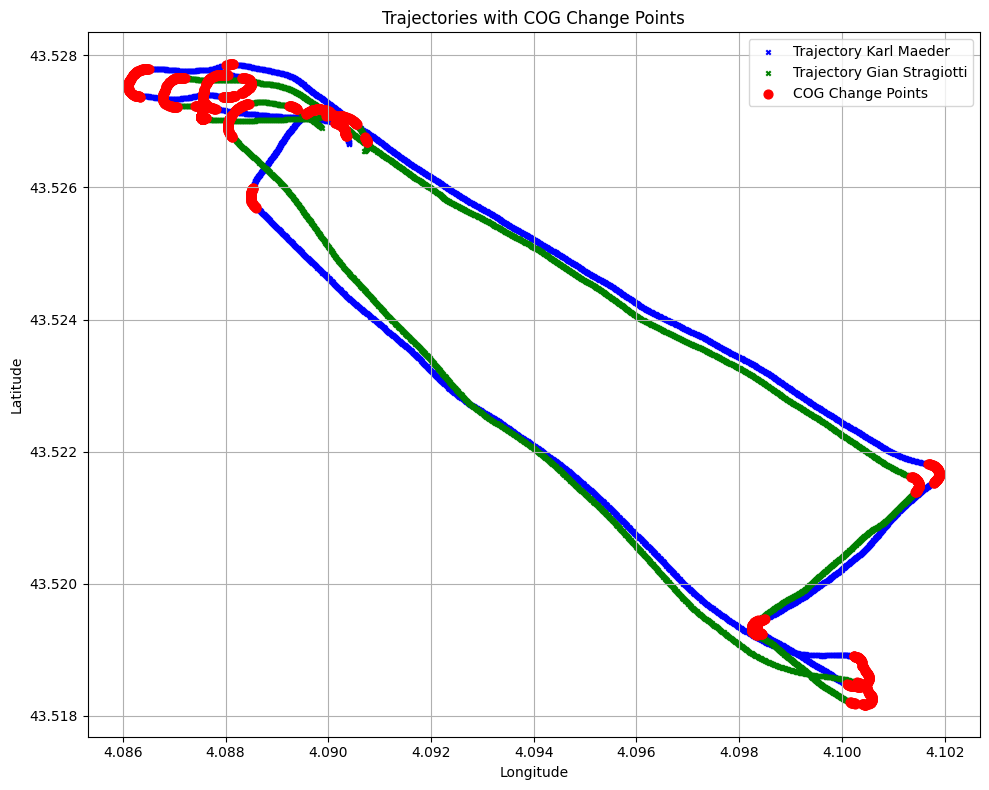

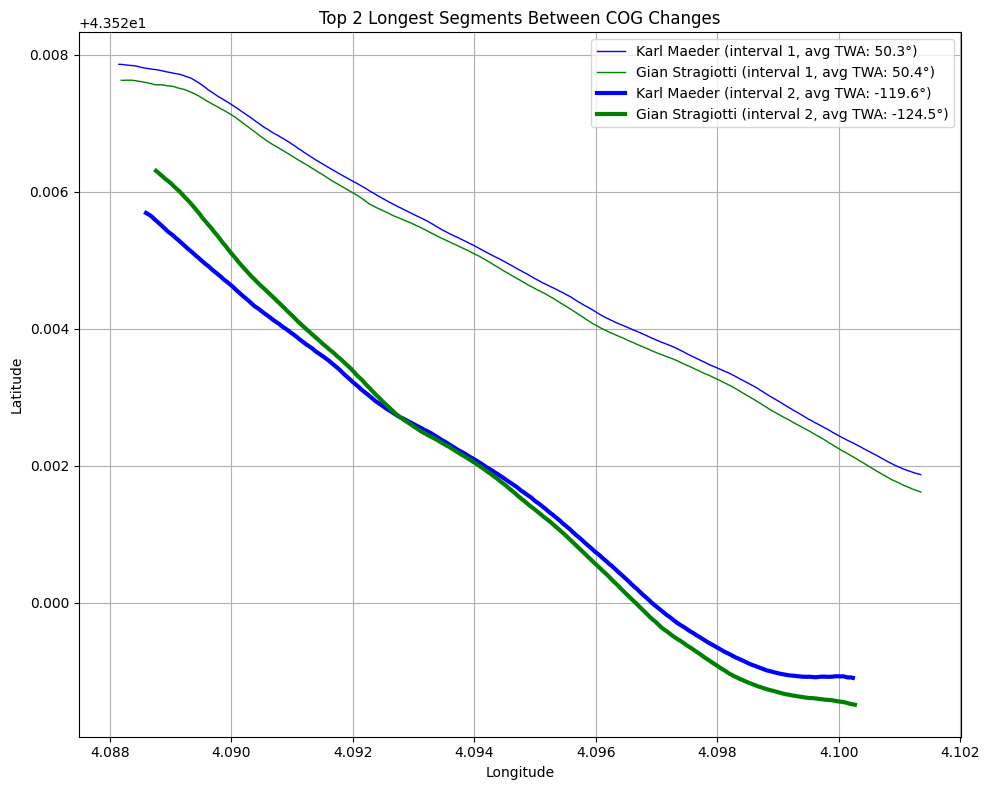

Analyse: Gian Stragiotti.csv et Karl Maeder.csv dans ../Data_Sailnjord/Straight_lines\06_06\06_06_Run2


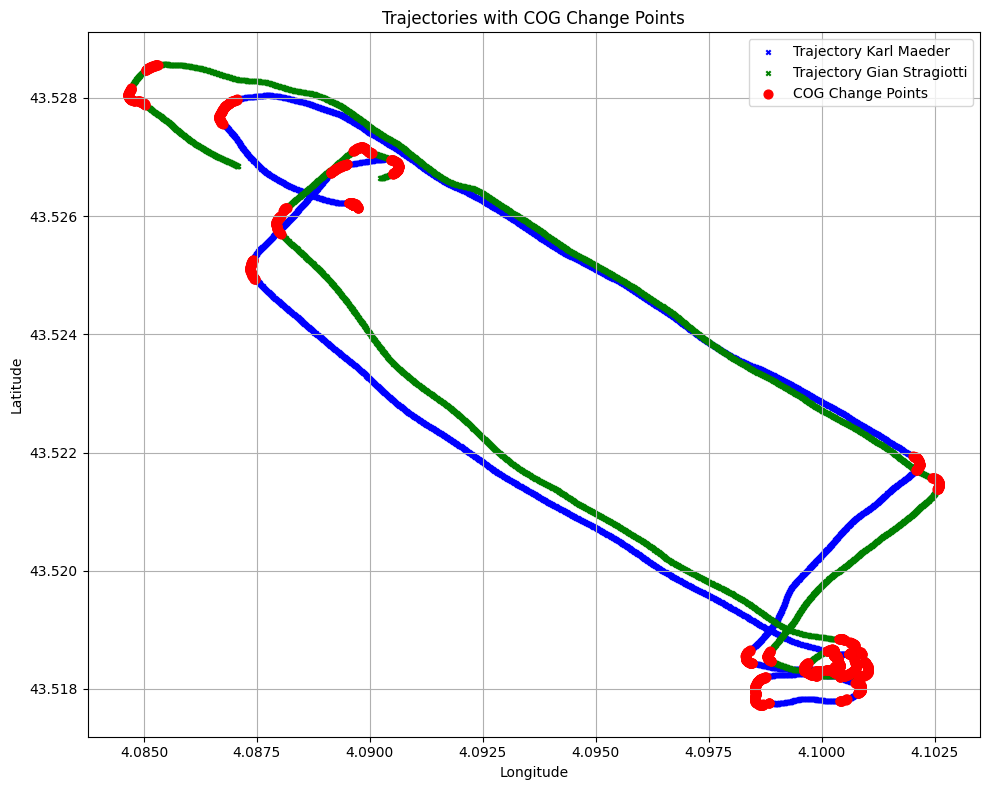

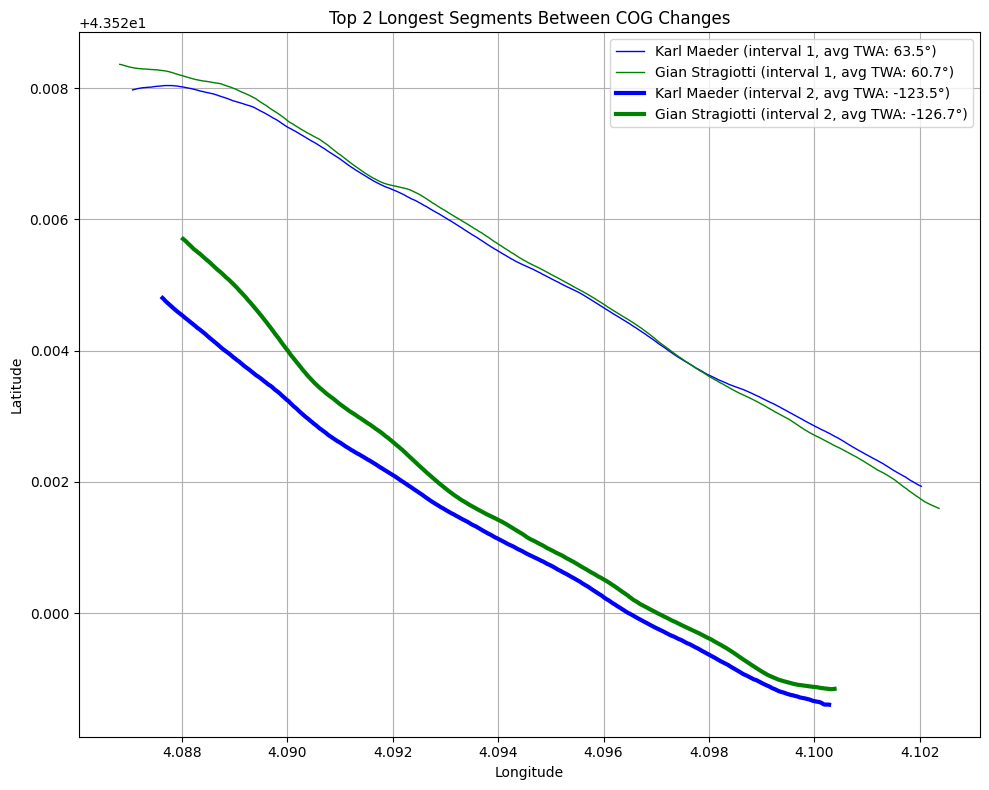

Analyse: Gian Stragiotti.csv et Karl Maeder.csv dans ../Data_Sailnjord/Straight_lines\06_06\06_06_Run3


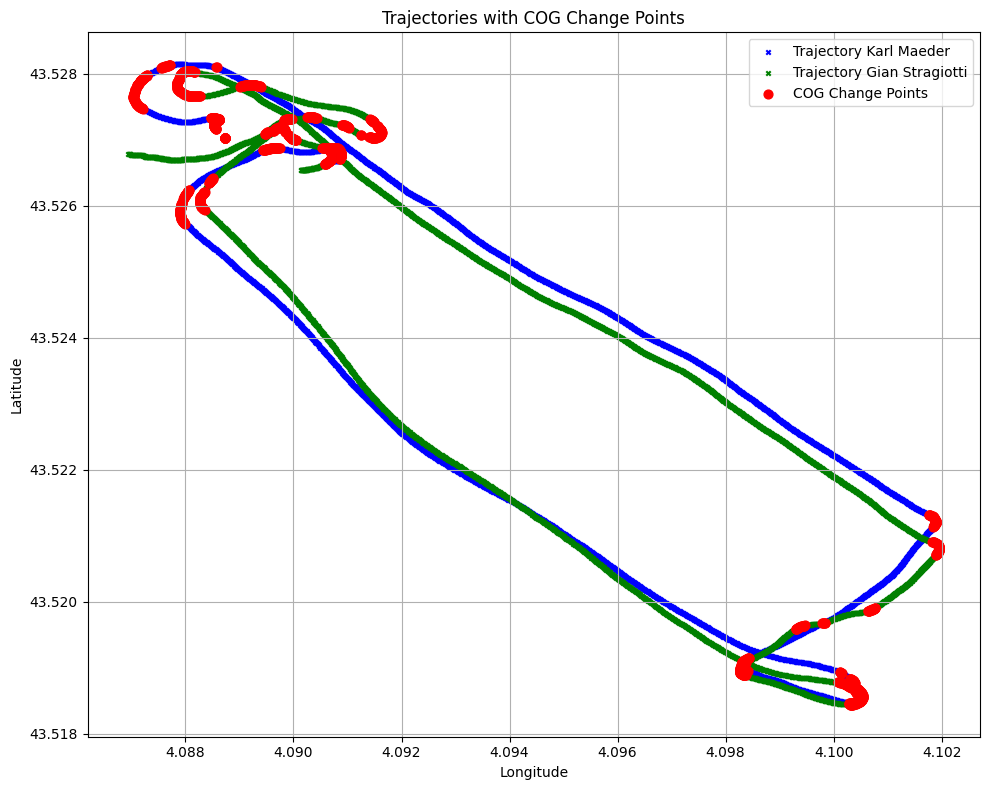

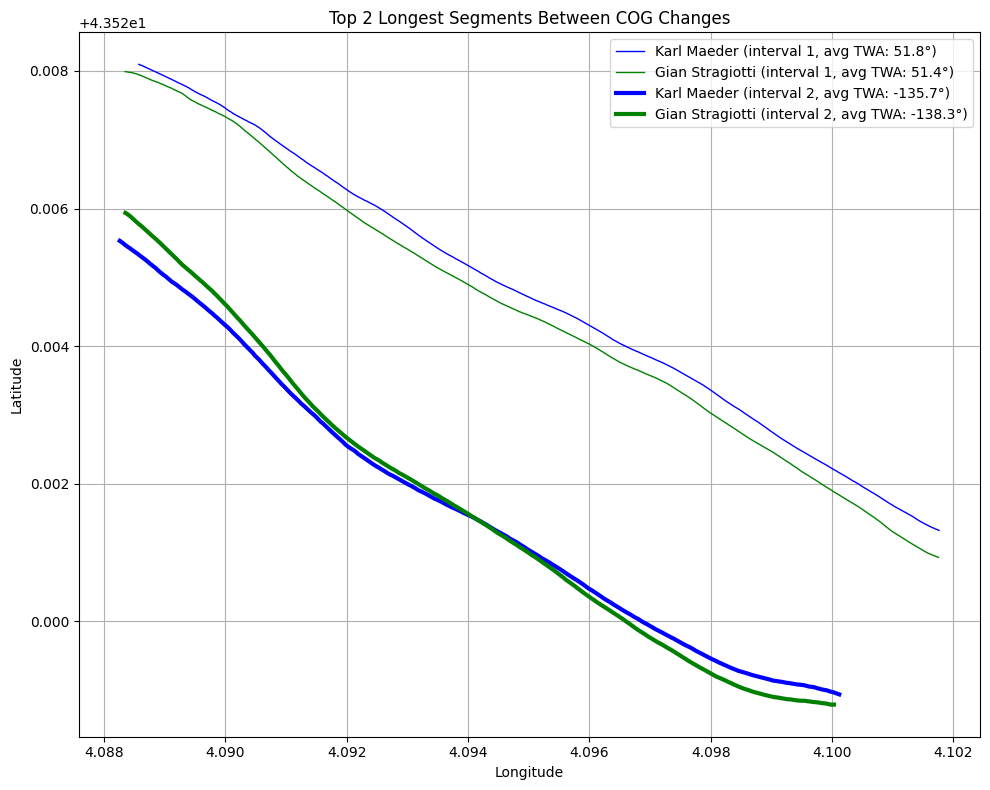

Analyse: Gian Stragiotti.csv et Karl Maeder.csv dans ../Data_Sailnjord/Straight_lines\06_06\06_06_Run4


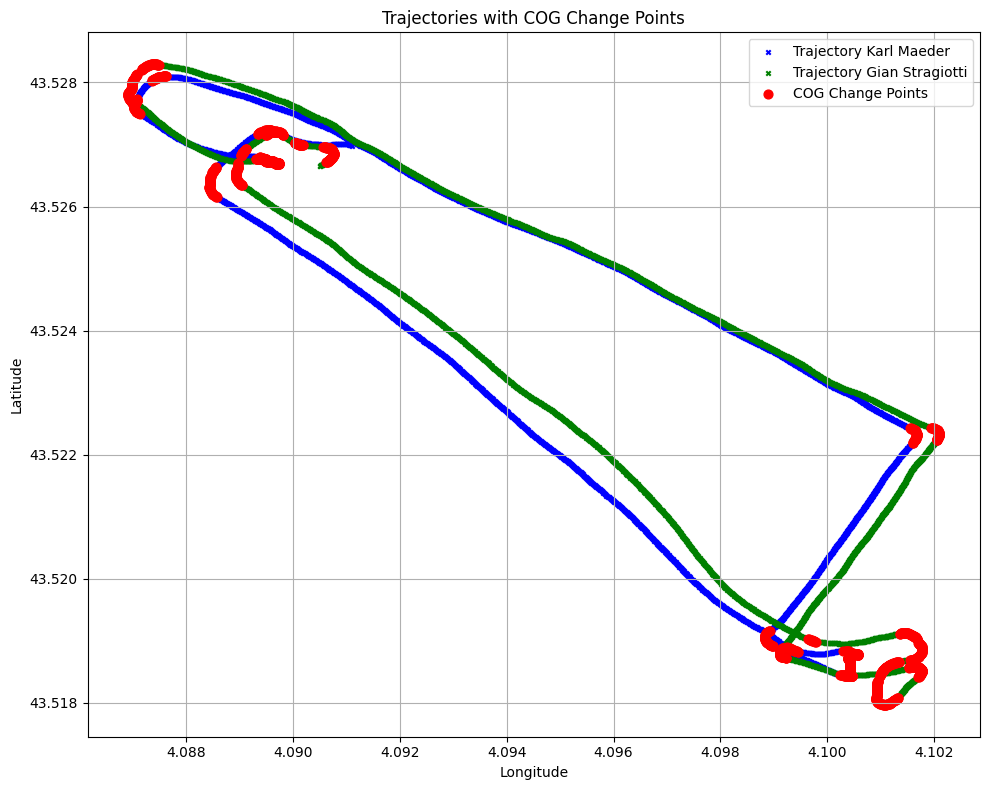

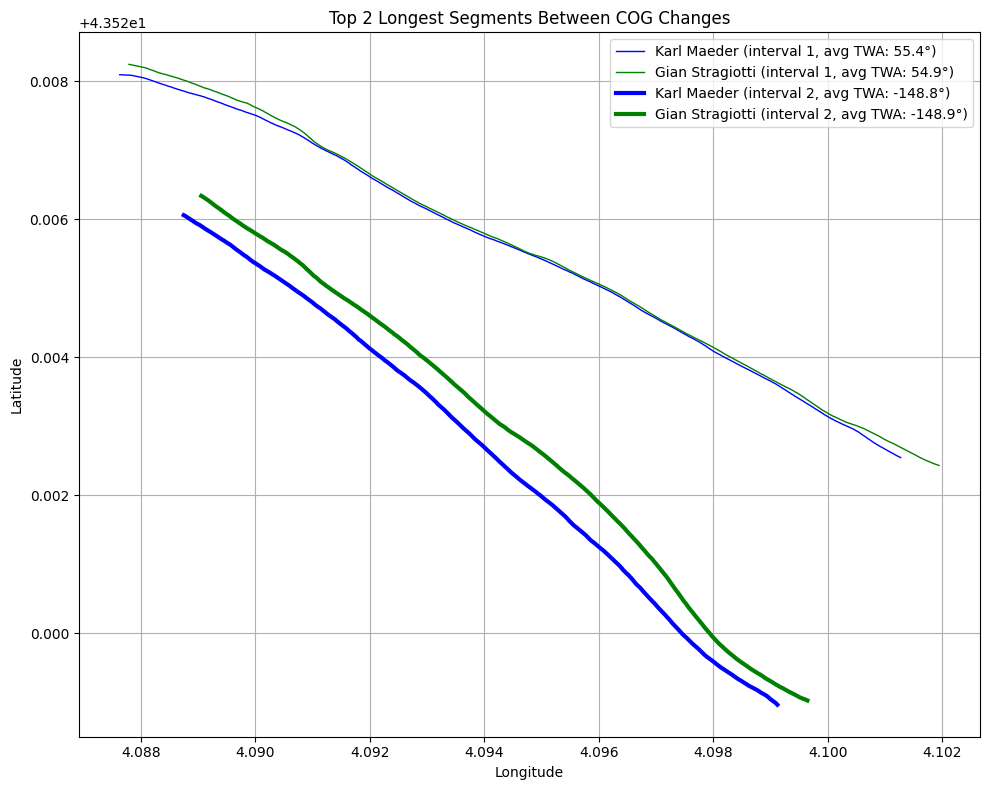

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\06_06\06_06_Run5


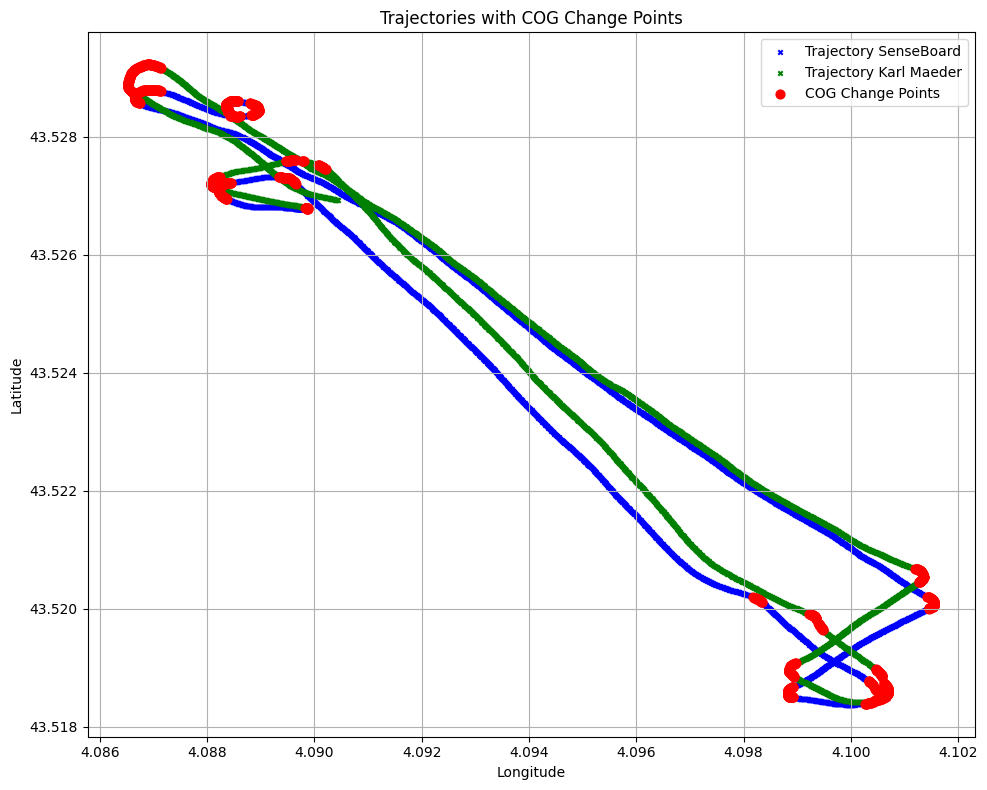

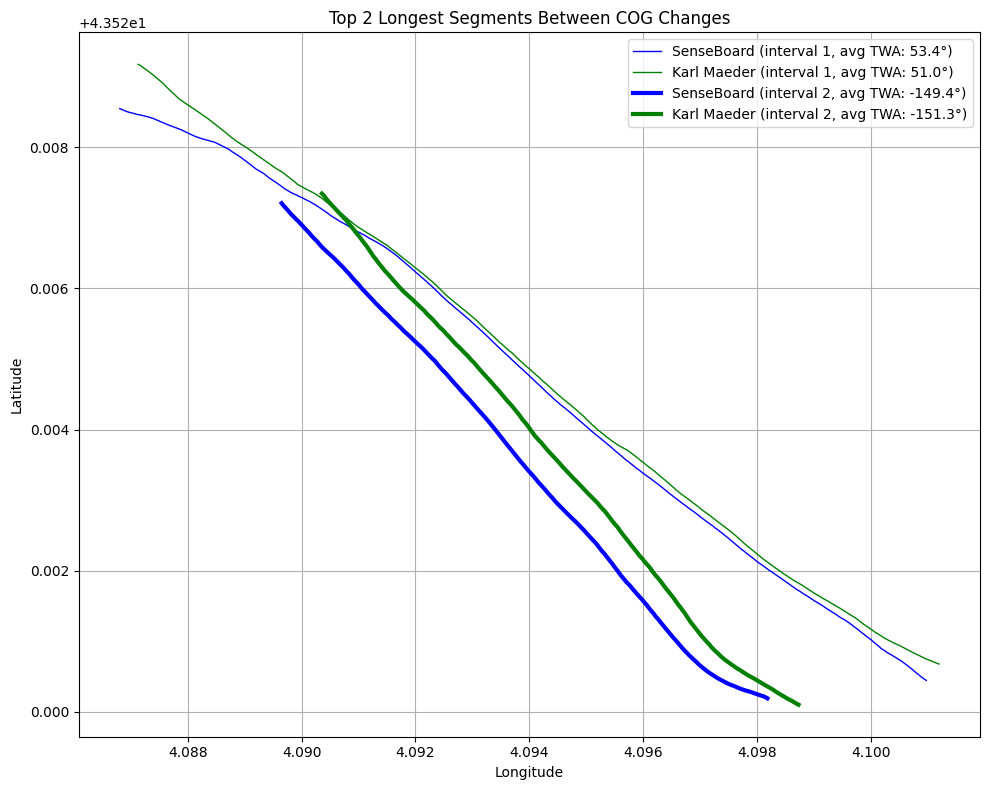

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\06_06\06_06_Run6


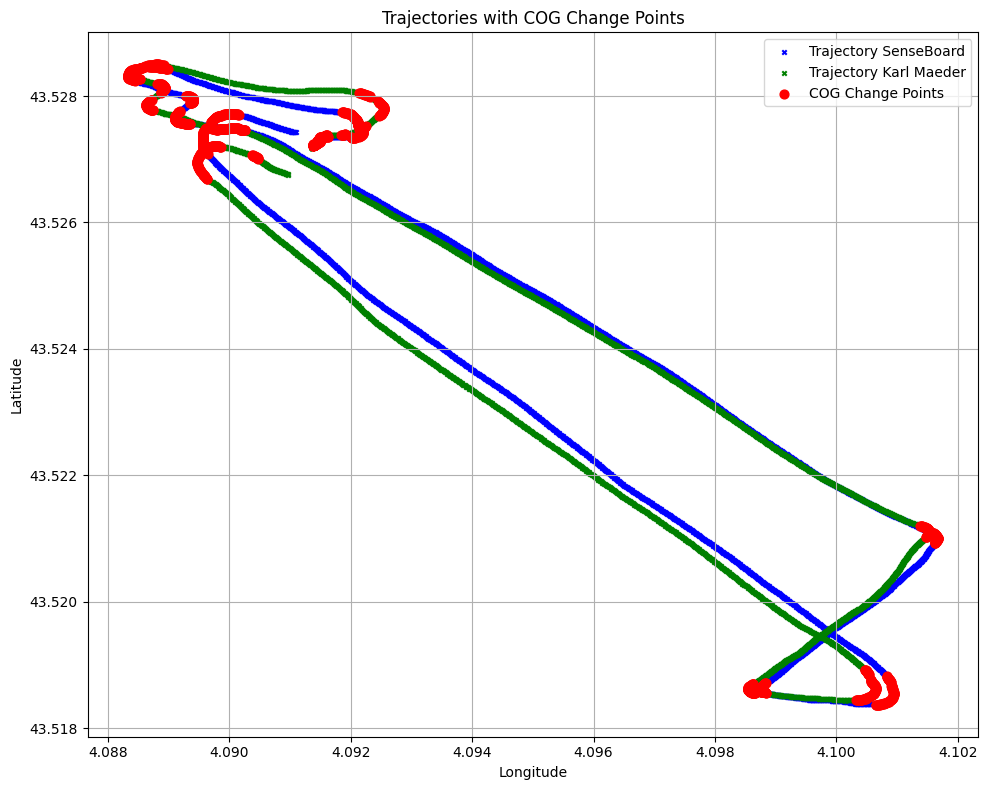

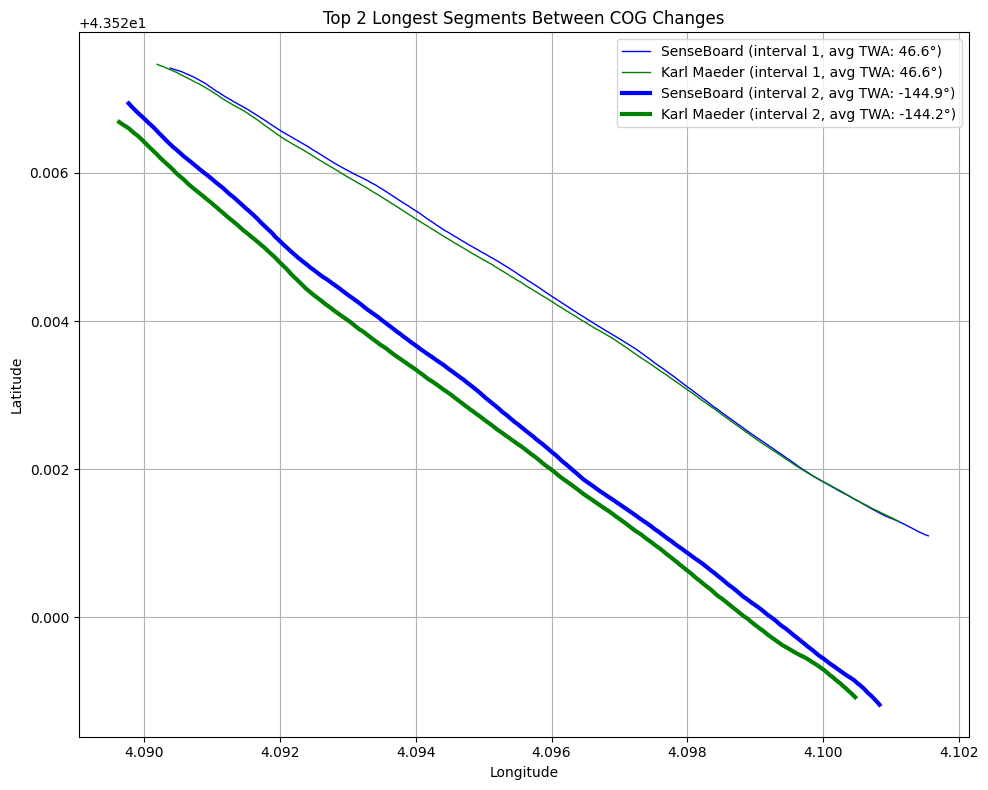

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\06_06\06_06_Run7


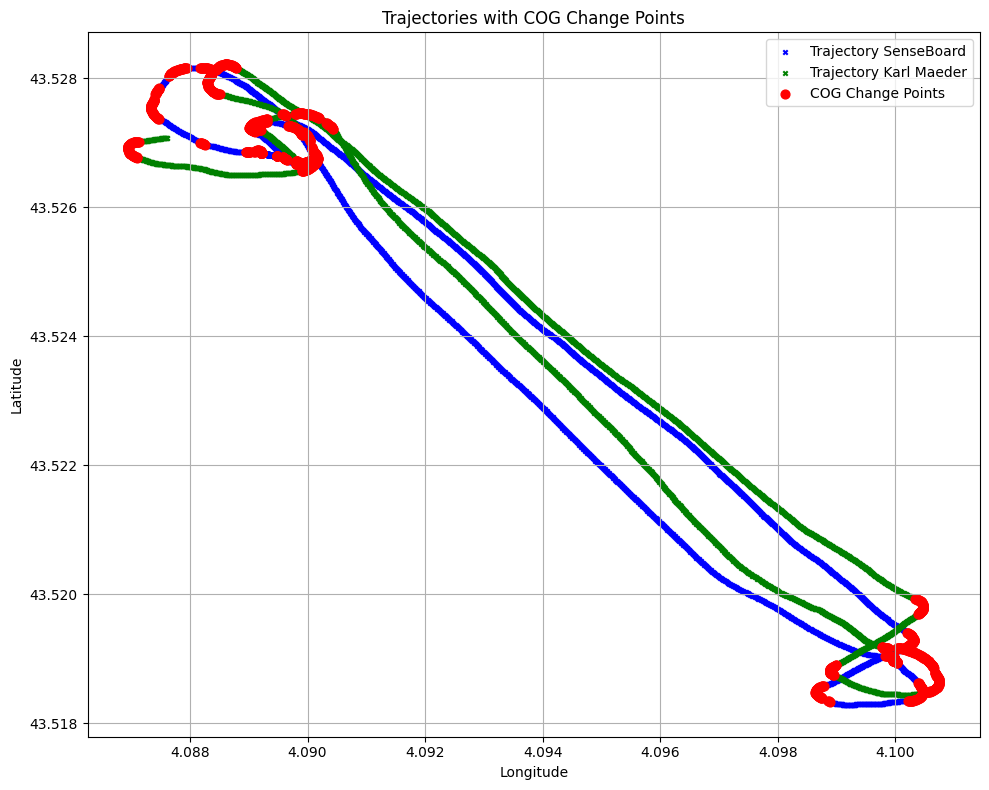

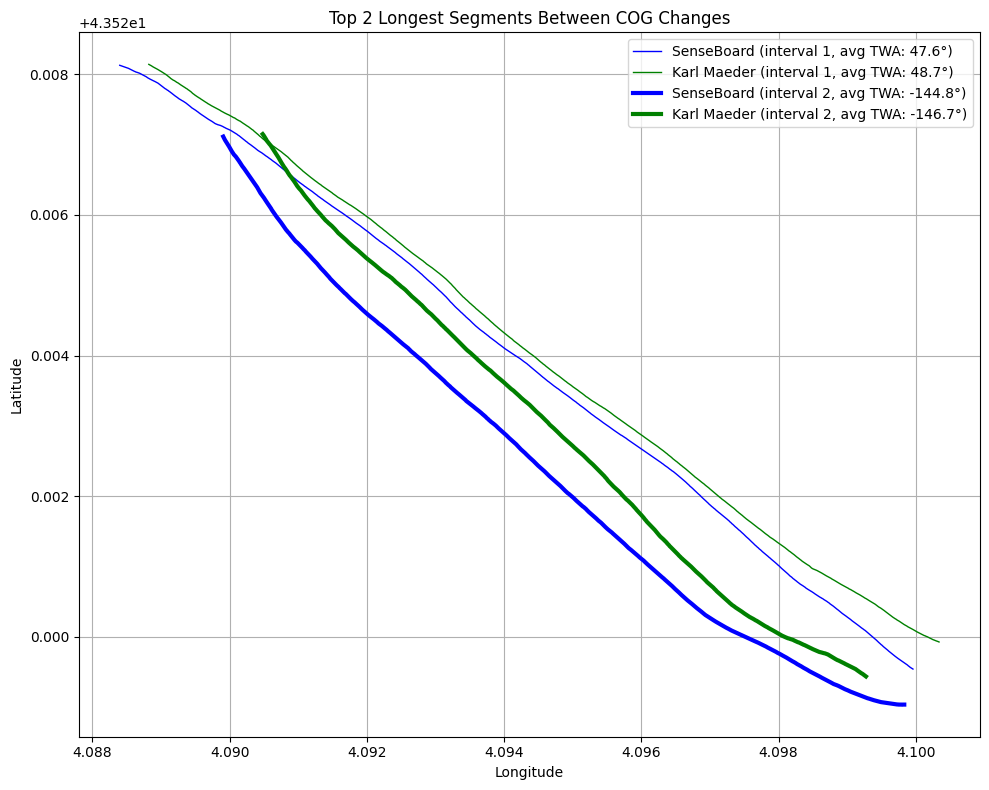

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\06_06\06_06_Run8


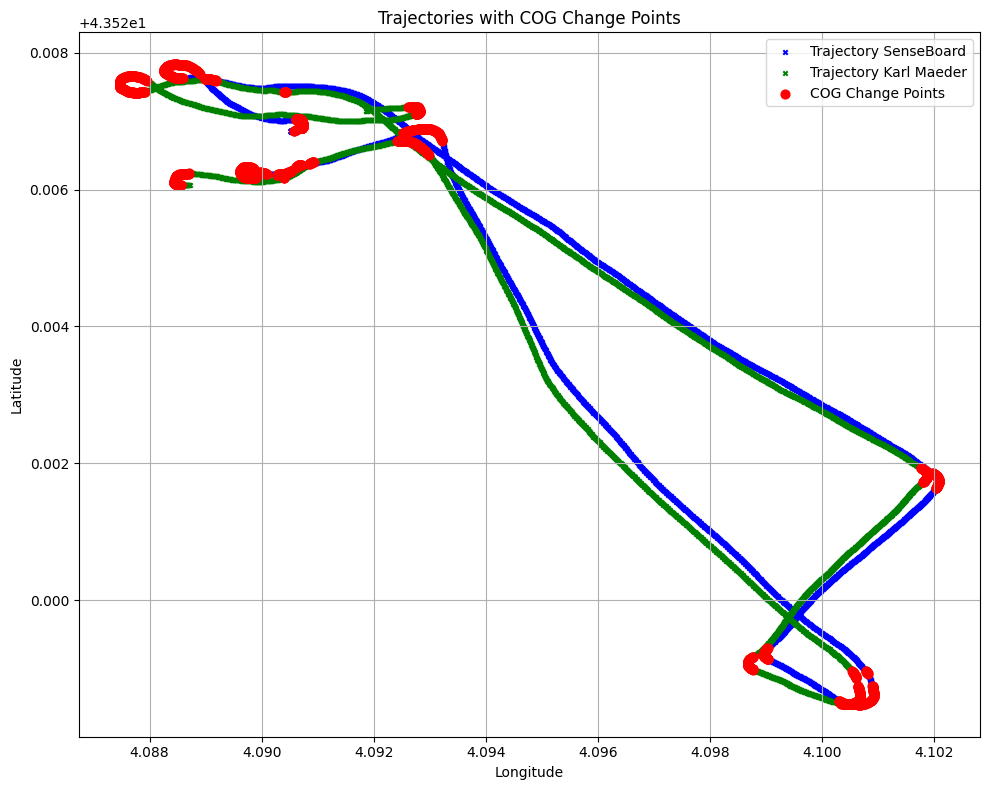

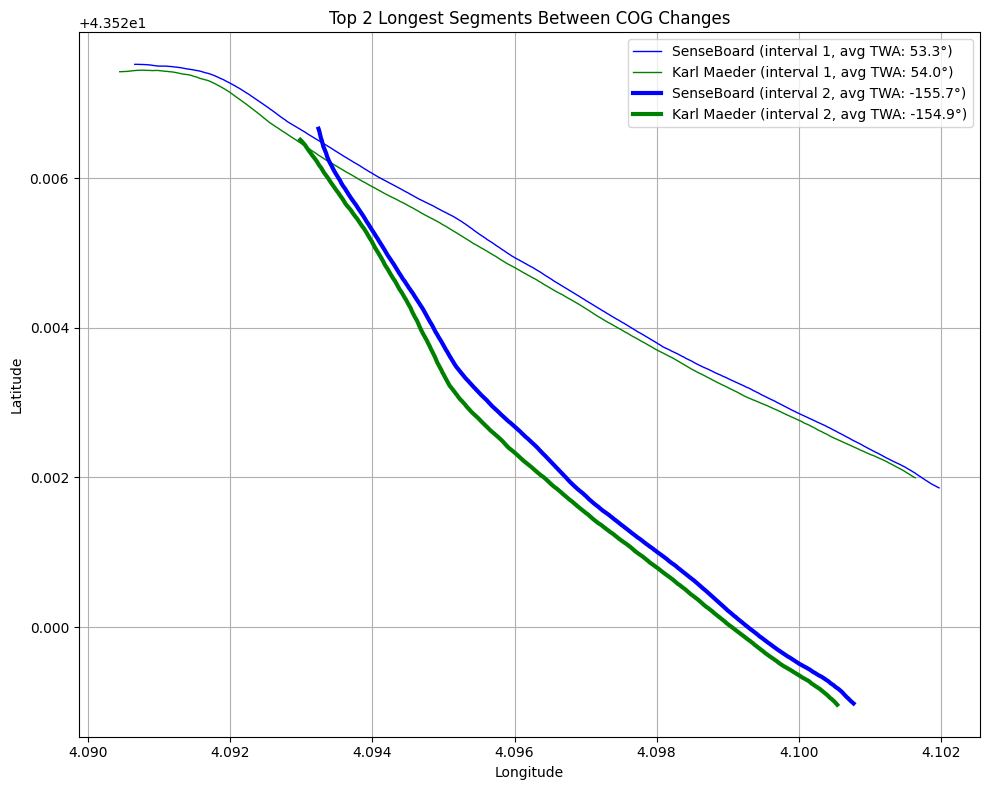

Analyse: Gian Stragiotti.csv et Karl Maeder.csv dans ../Data_Sailnjord/Straight_lines\07_06\07_06_Run1


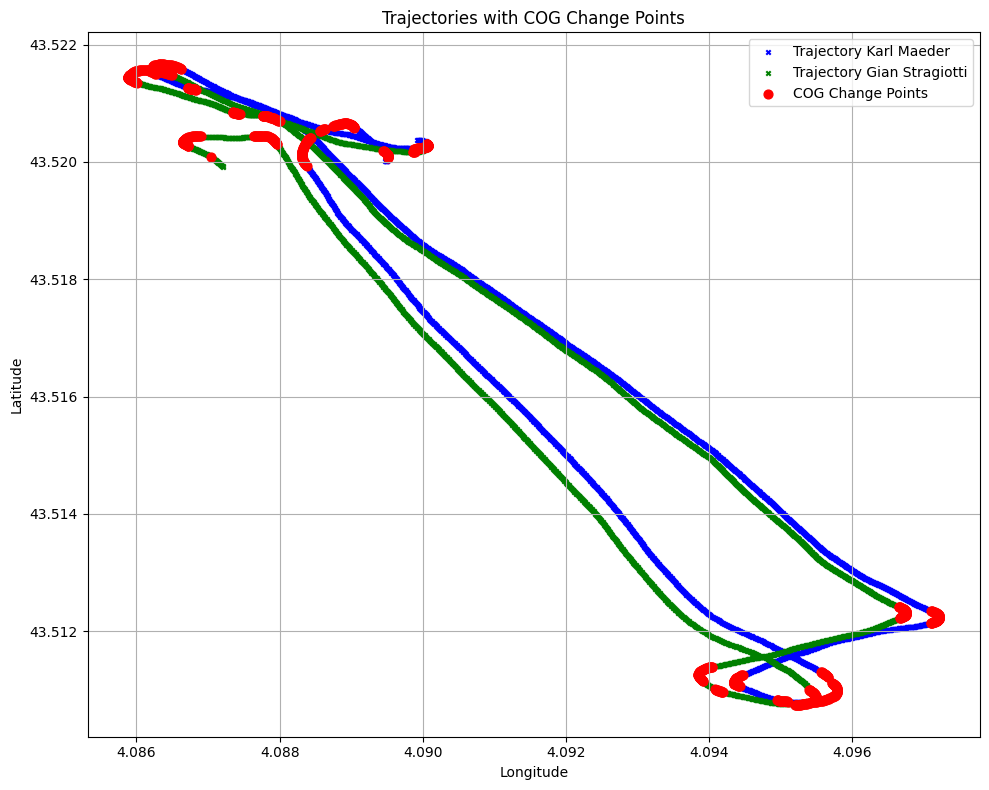

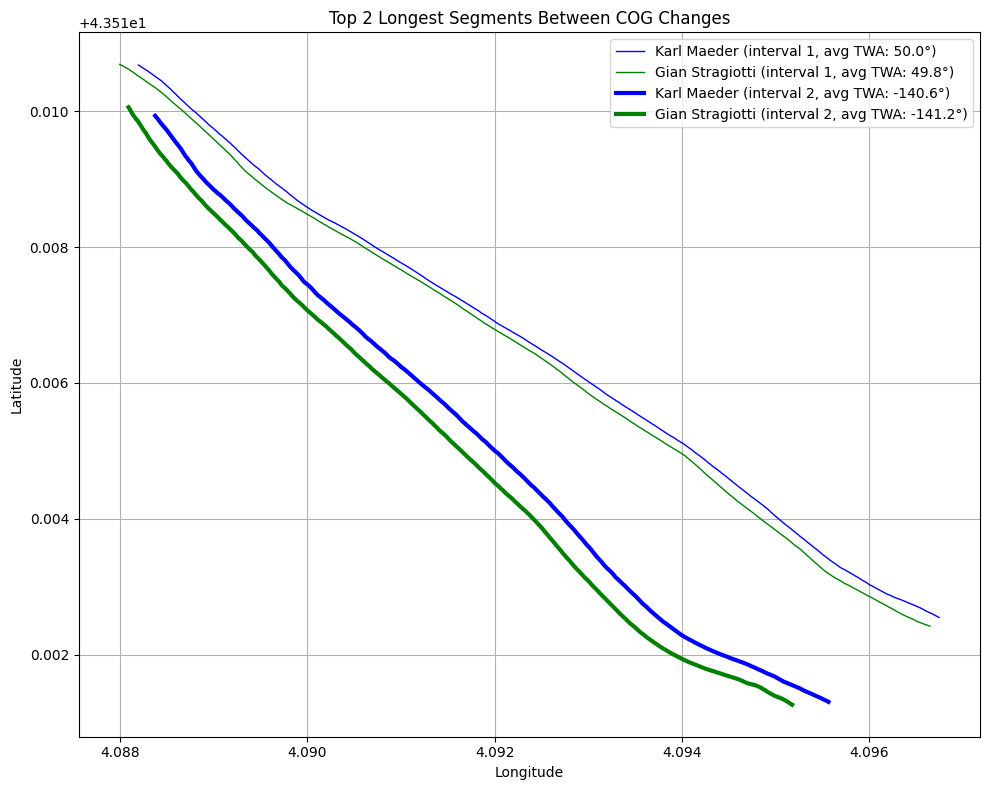

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\07_06\07_06_Run10


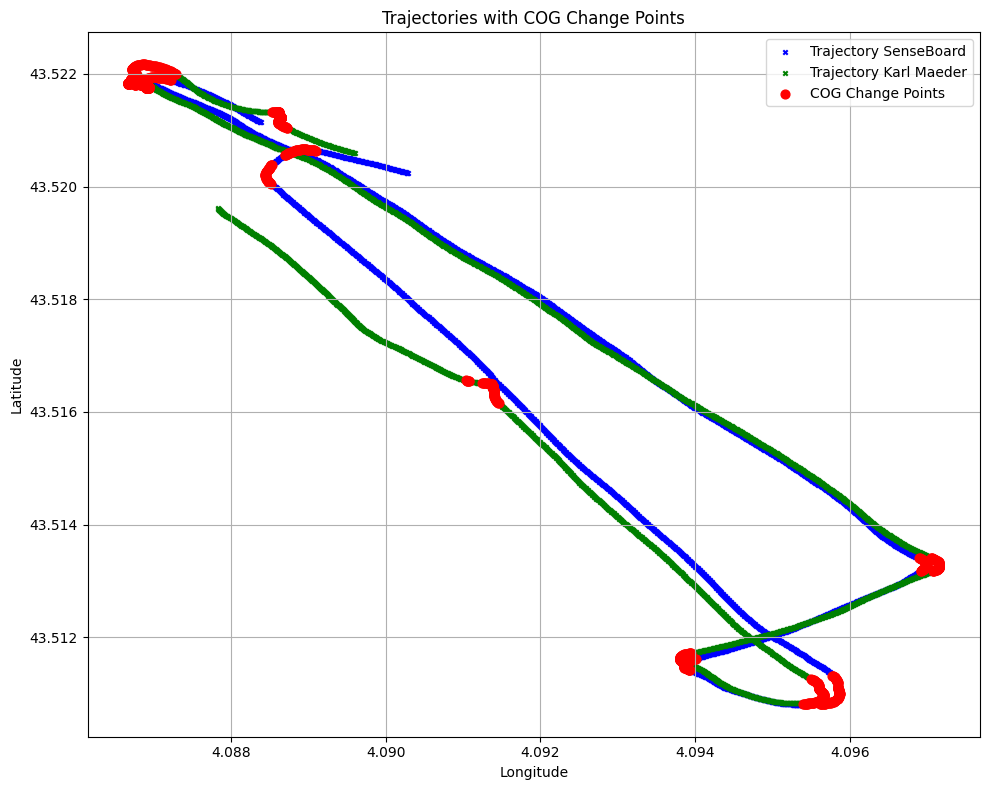

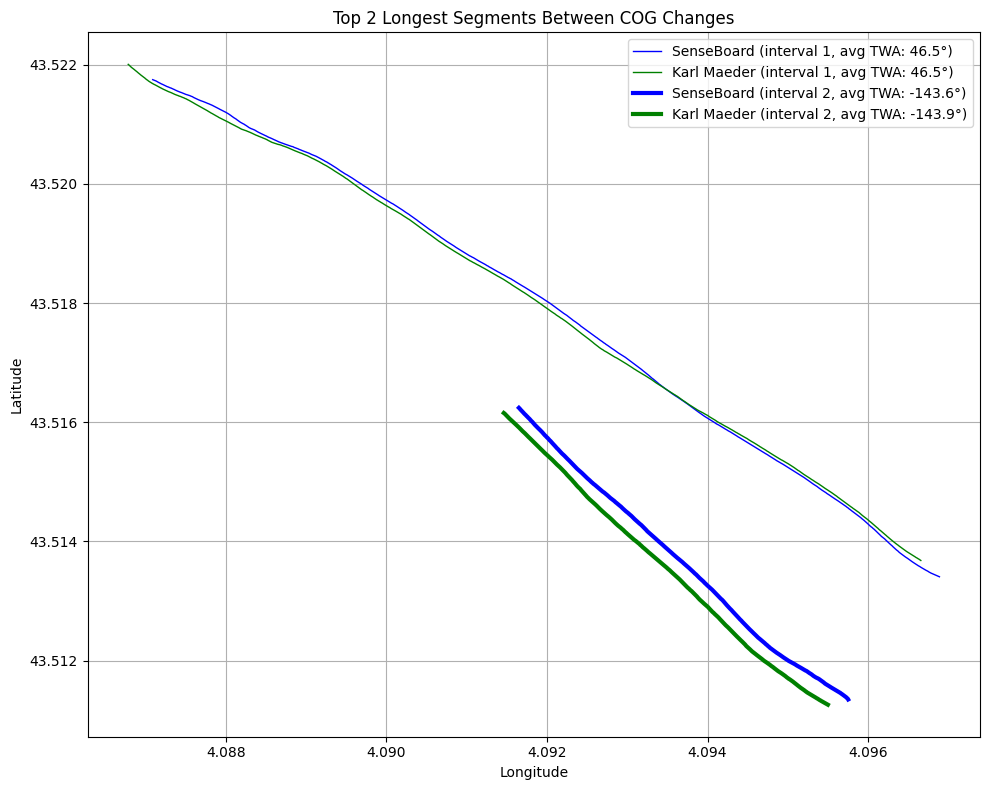

Analyse: Gian Stragiotti.csv et Karl Maeder.csv dans ../Data_Sailnjord/Straight_lines\07_06\07_06_Run2


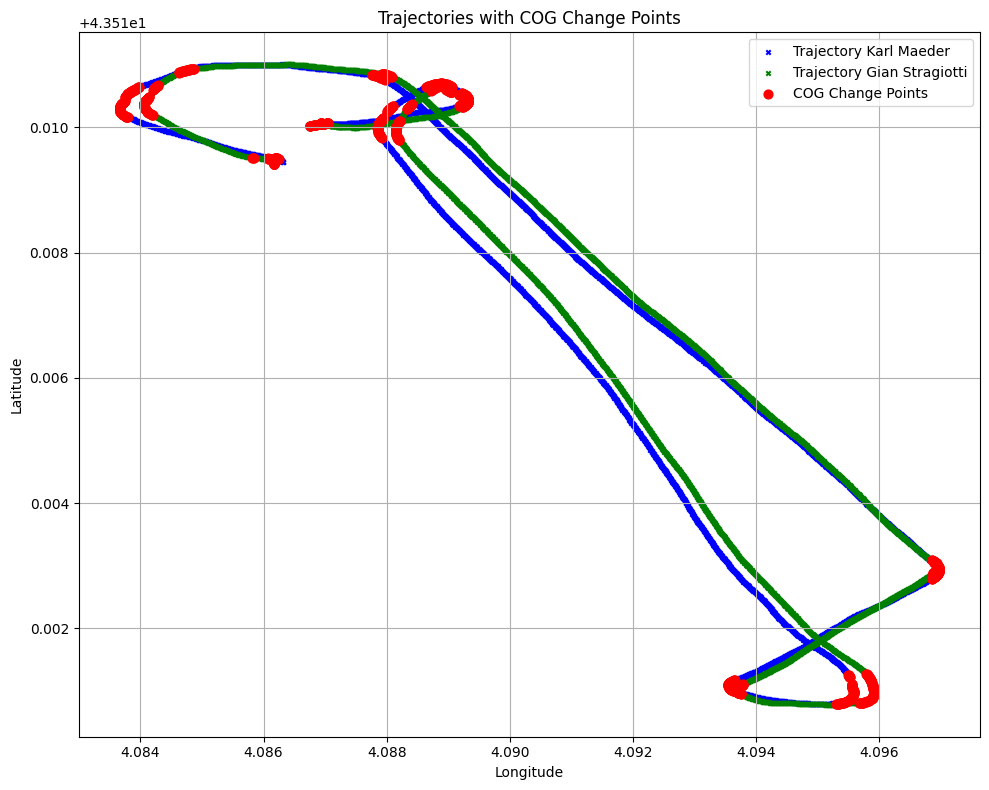

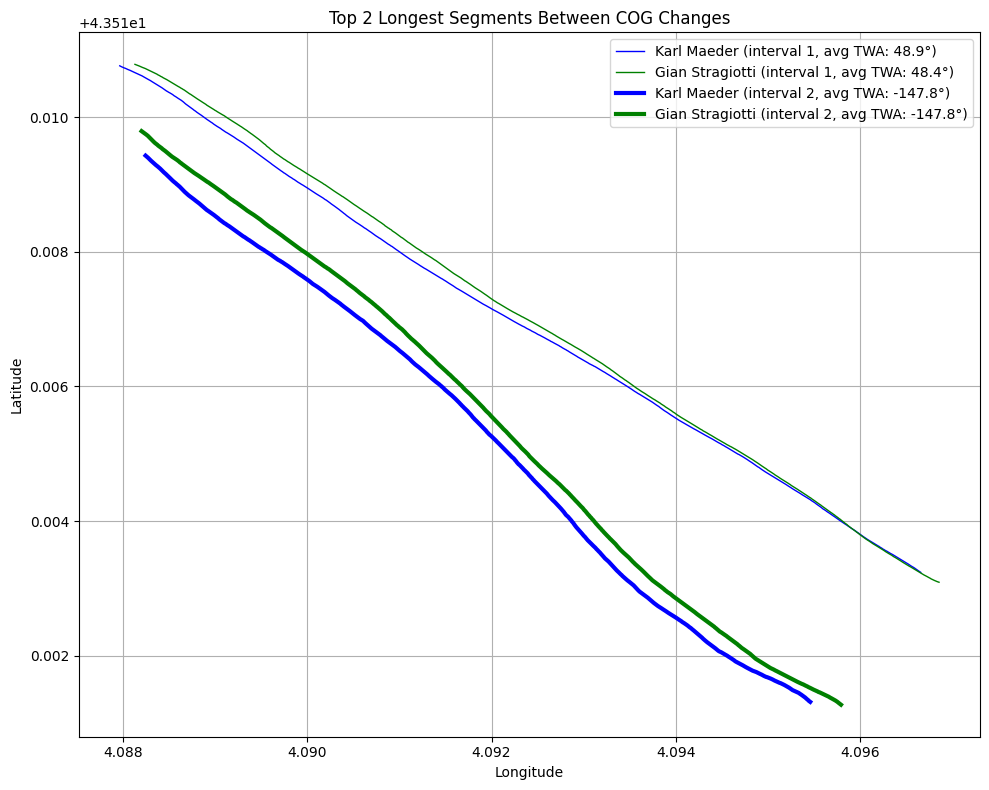

Analyse: Gian Stragiotti.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\07_06\07_06_Run3


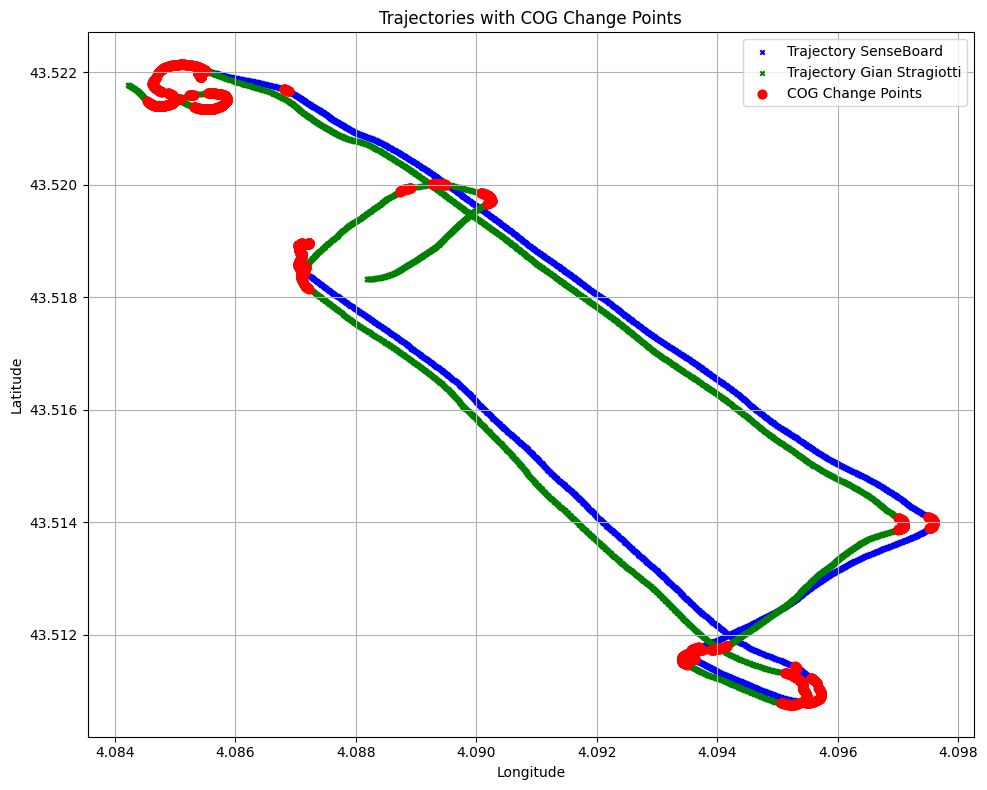

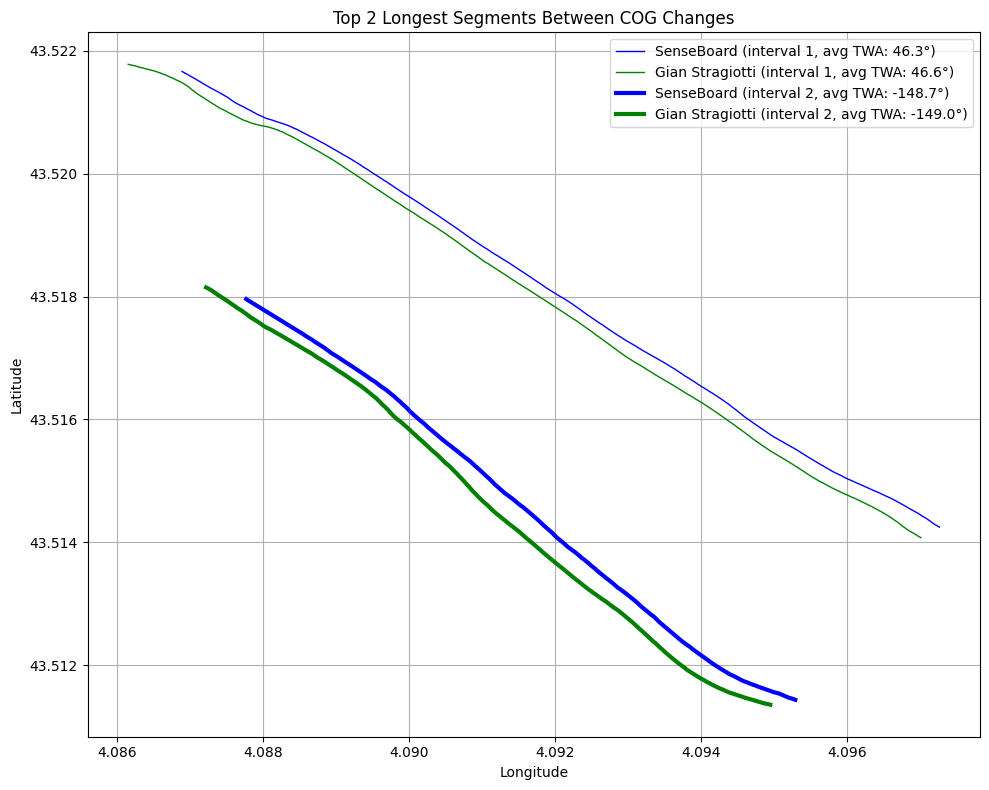

Analyse: Gian Stragiotti.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\07_06\07_06_Run4


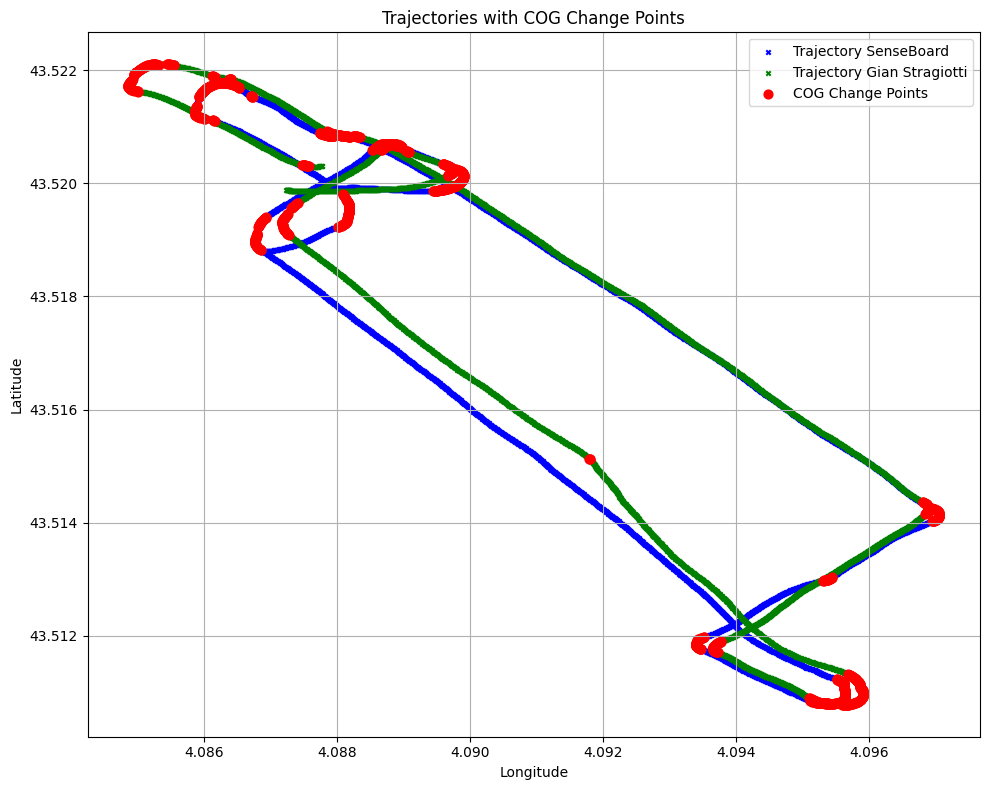

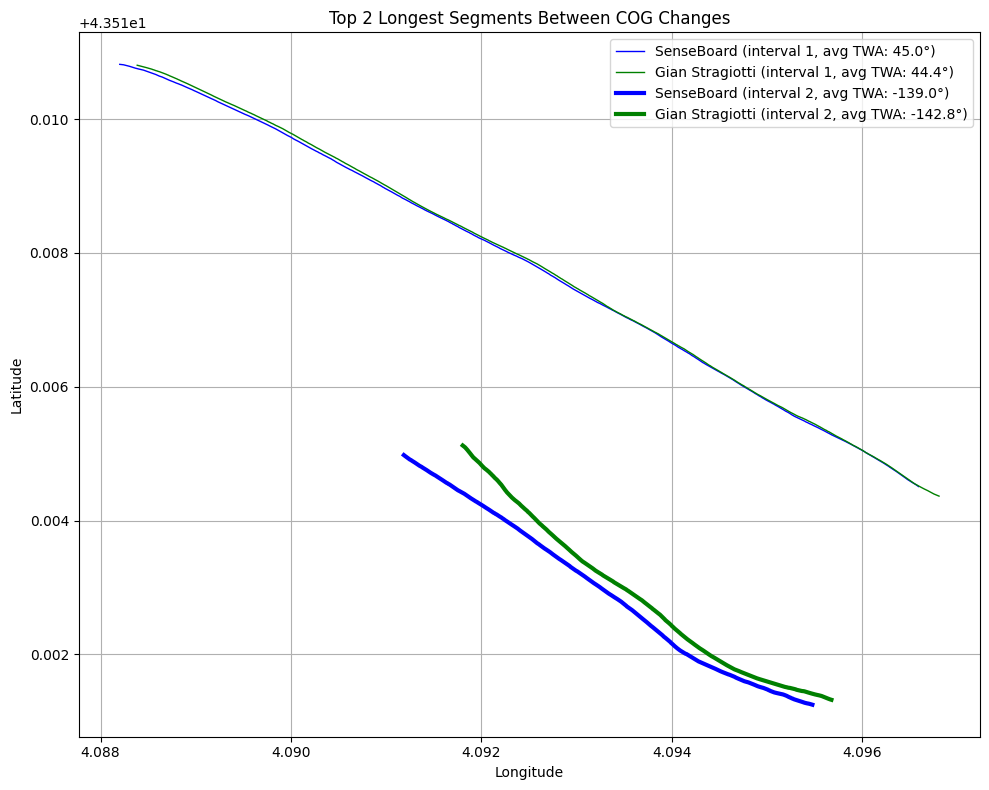

Analyse: Gian Stragiotti.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\07_06\07_06_Run5


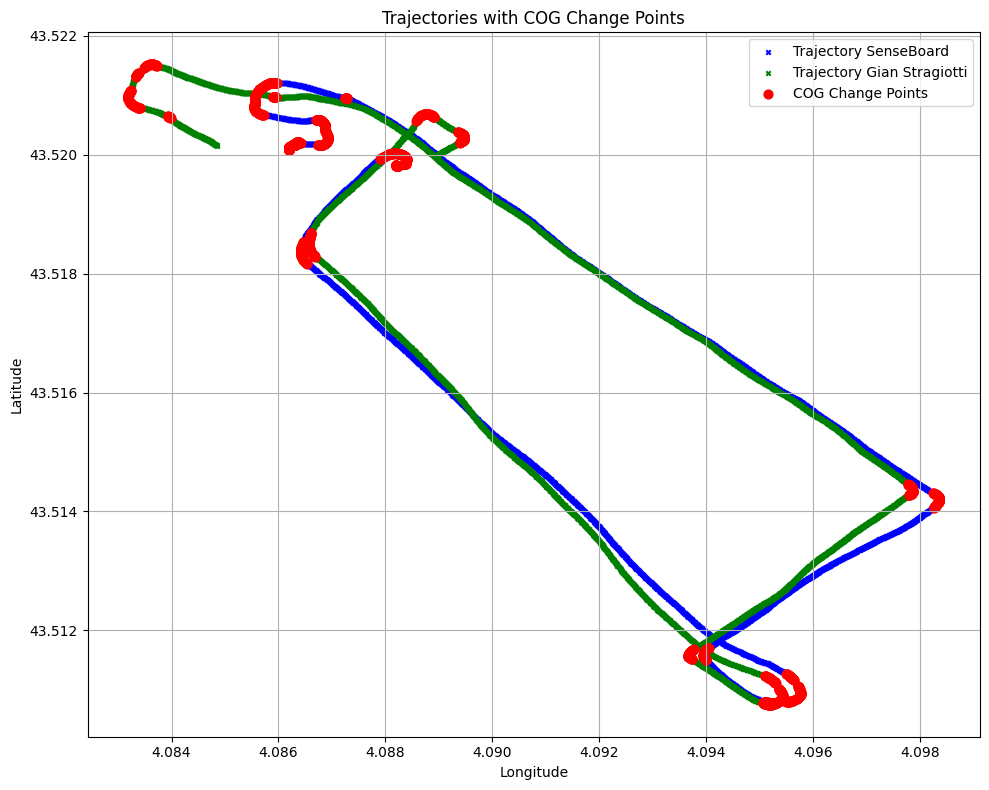

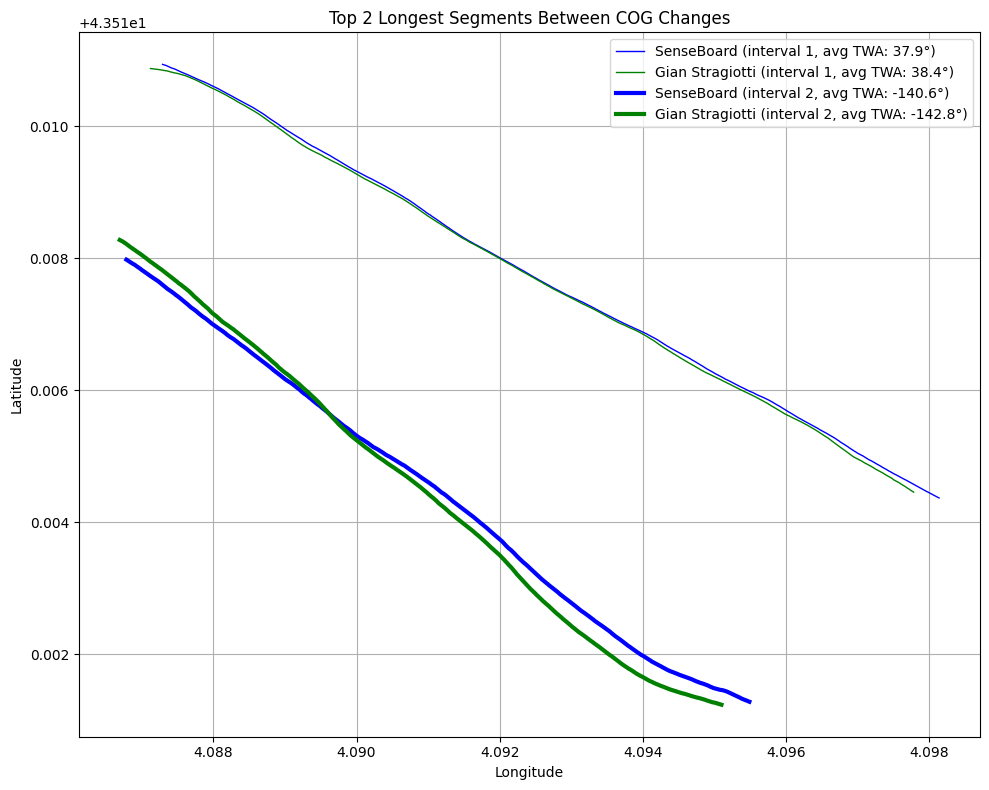

Analyse: Gian Stragiotti.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\07_06\07_06_Run6


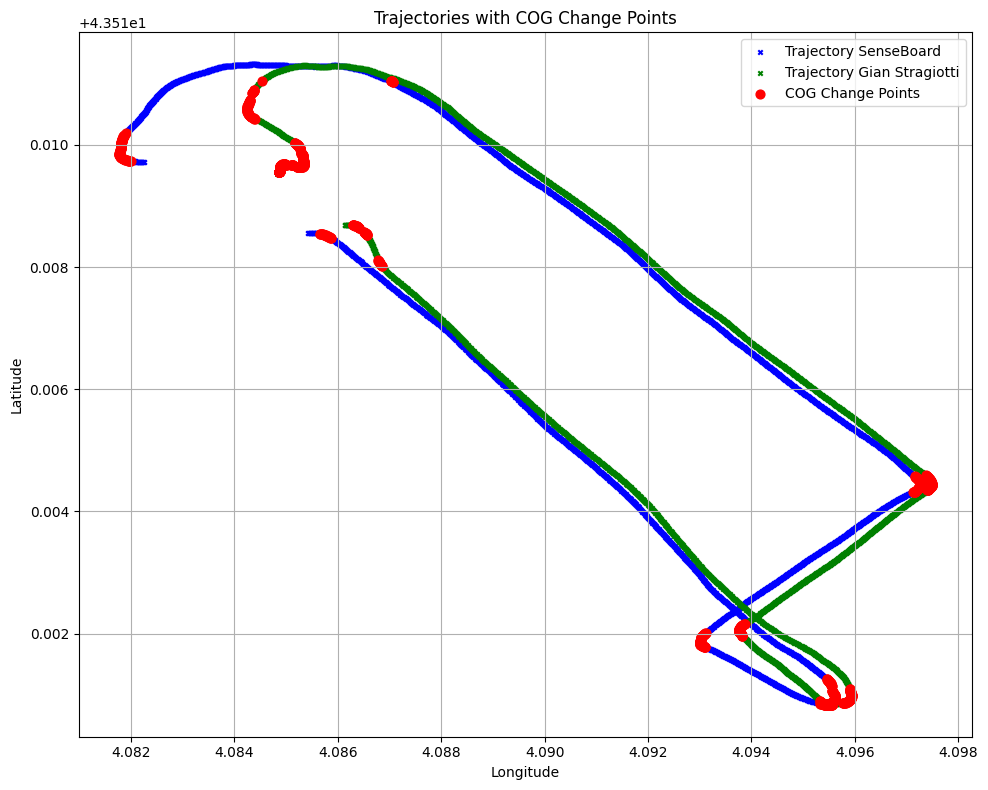

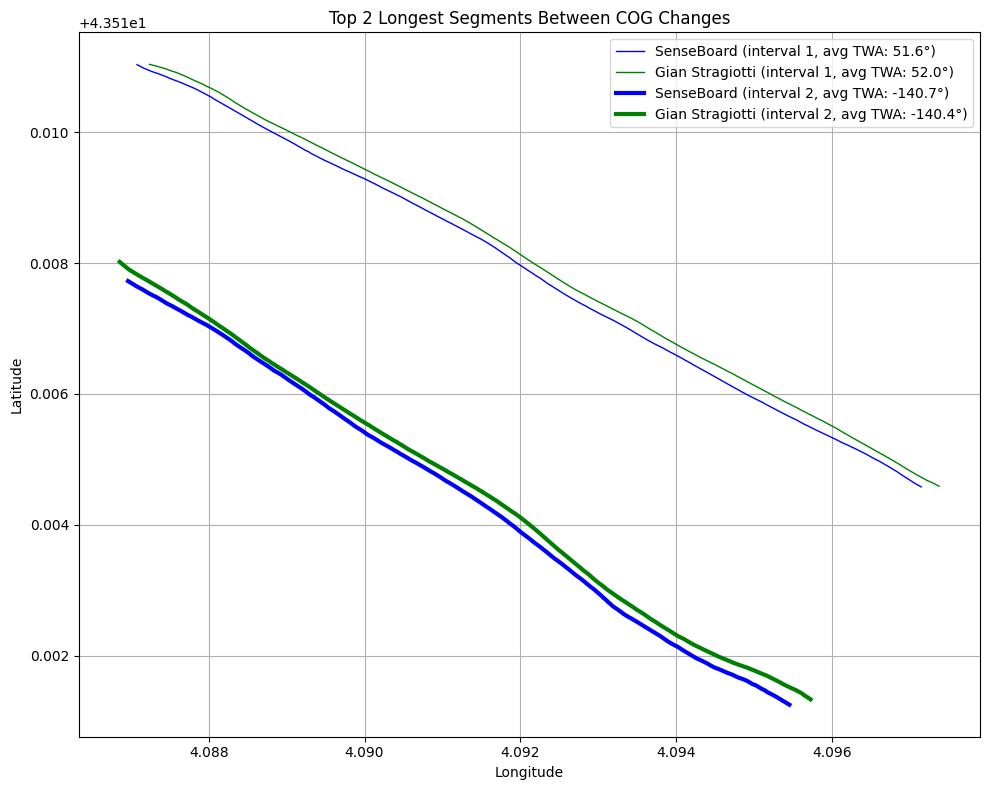

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\07_06\07_06_Run7


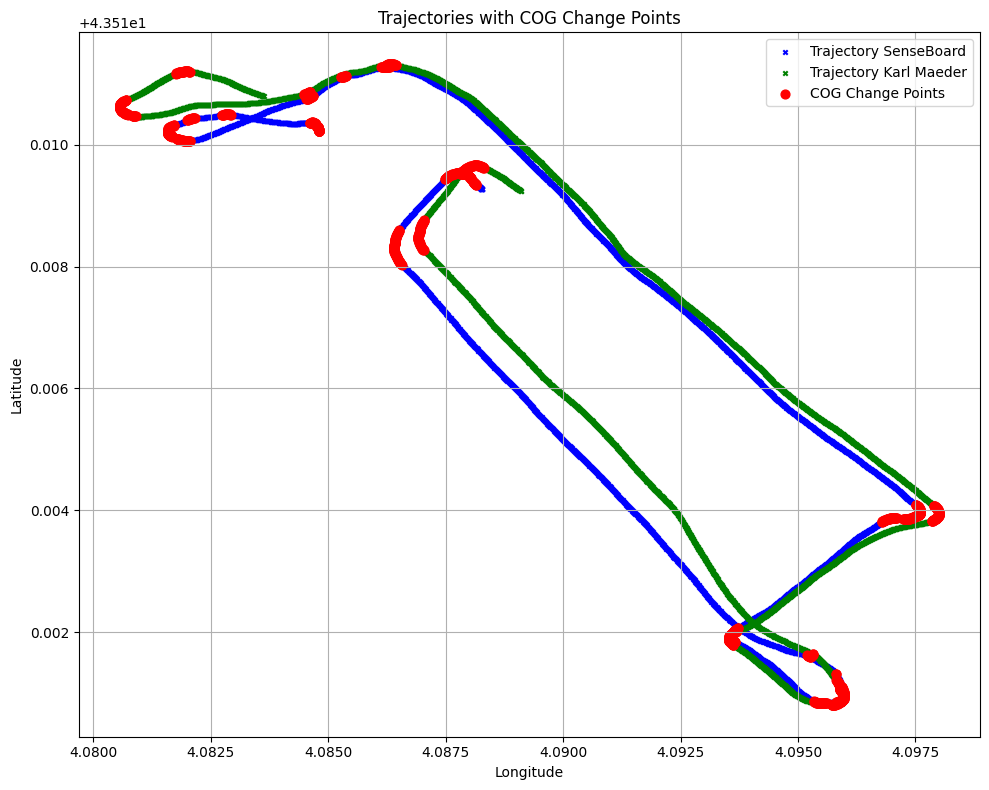

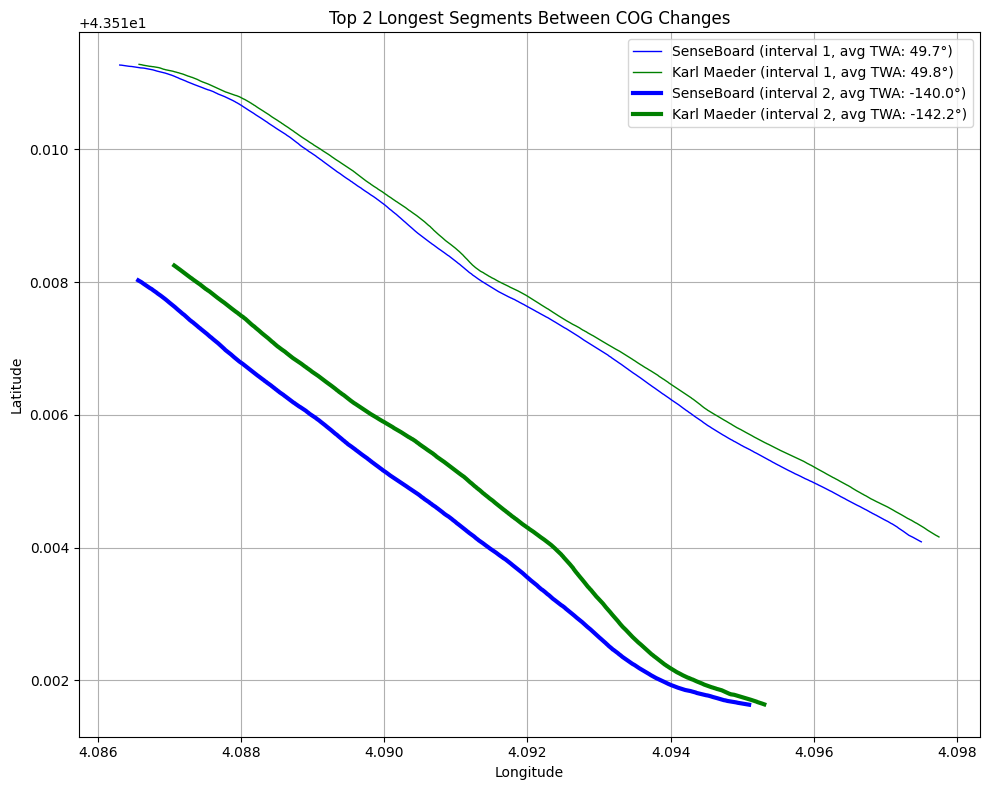

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\07_06\07_06_Run8


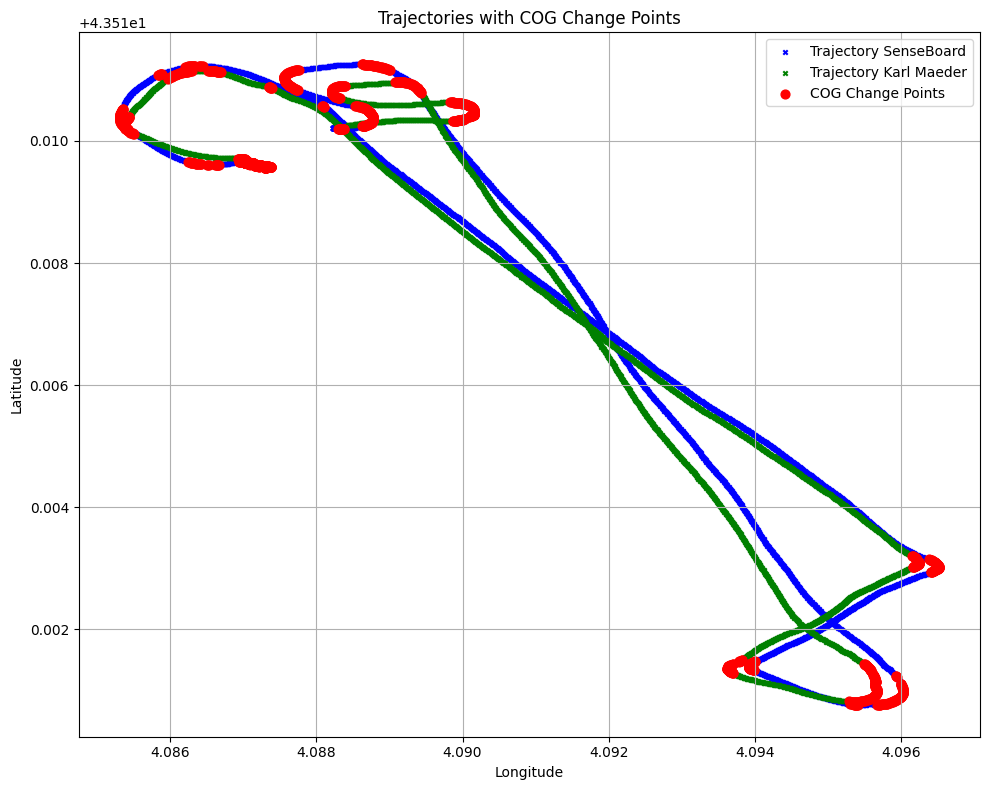

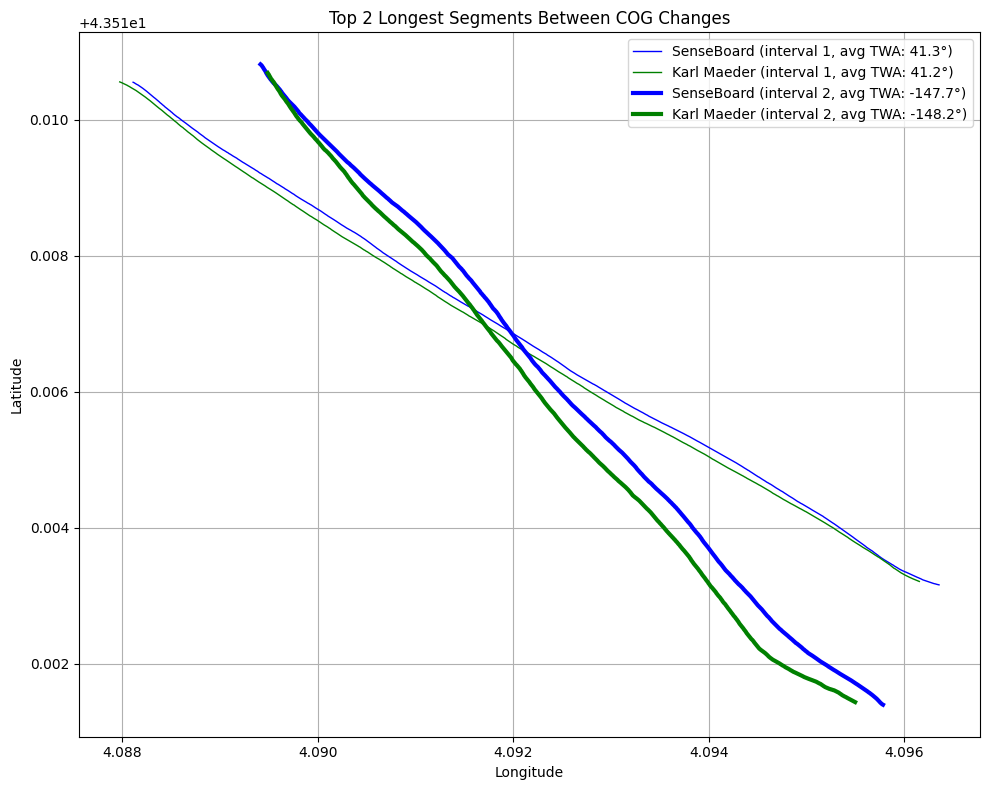

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\07_06\07_06_Run9


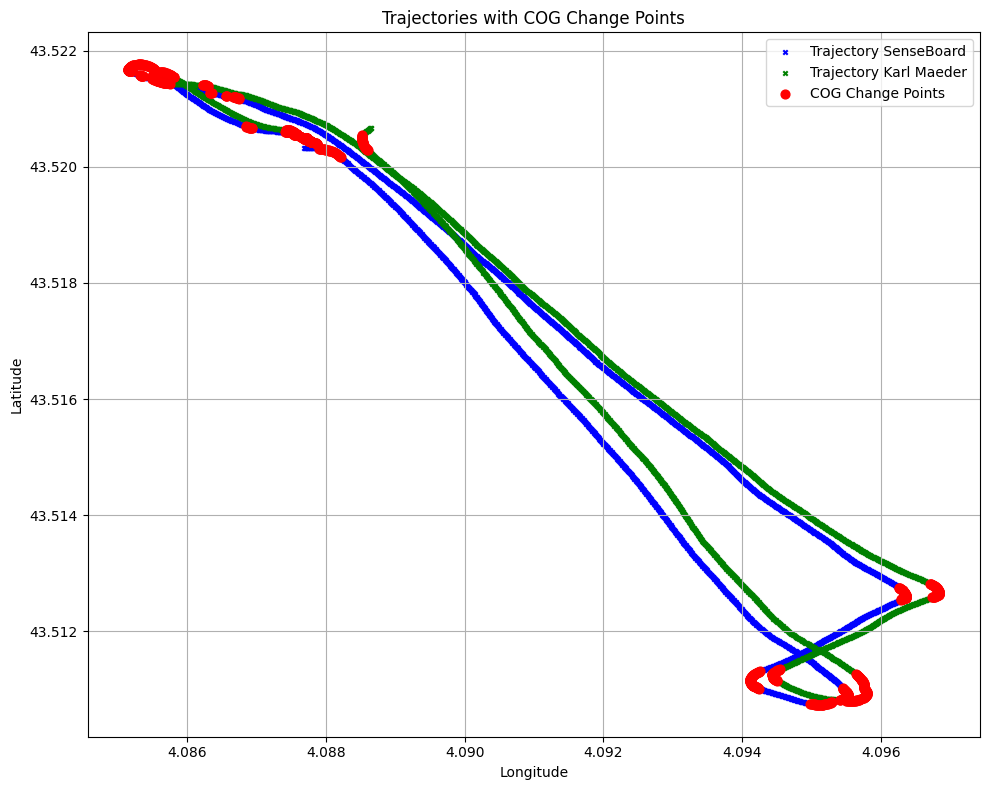

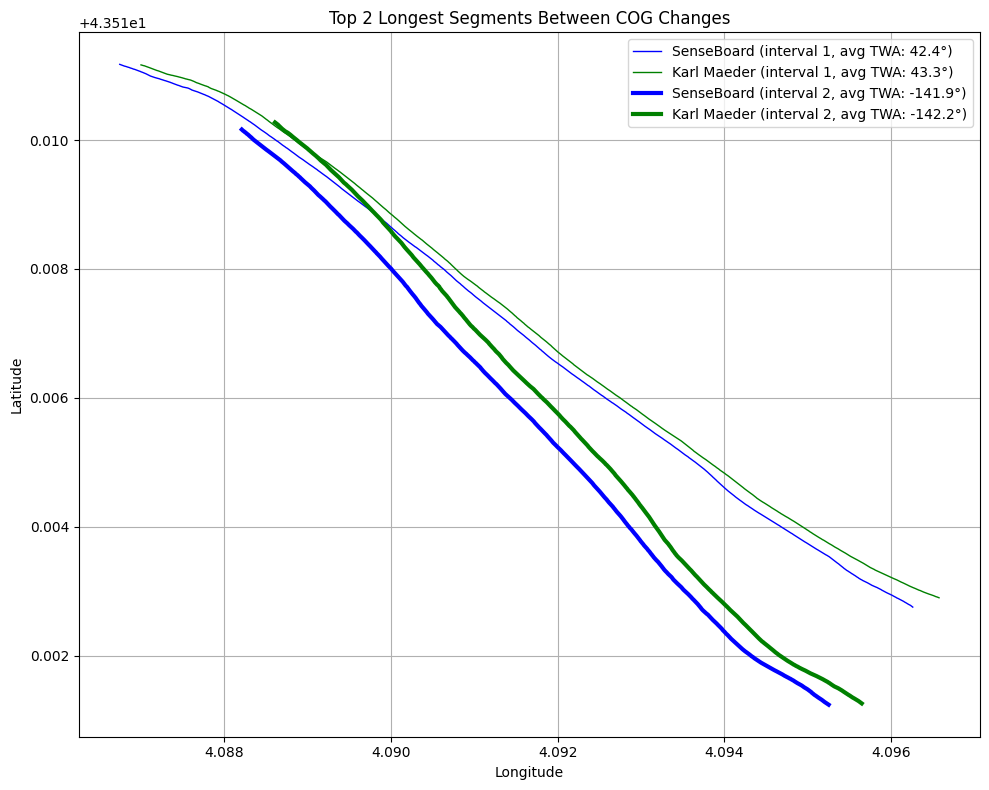

Analyse: Gian Stragiotti.csv et Karl Maeder.csv dans ../Data_Sailnjord/Straight_lines\09_06\09_06_Run1


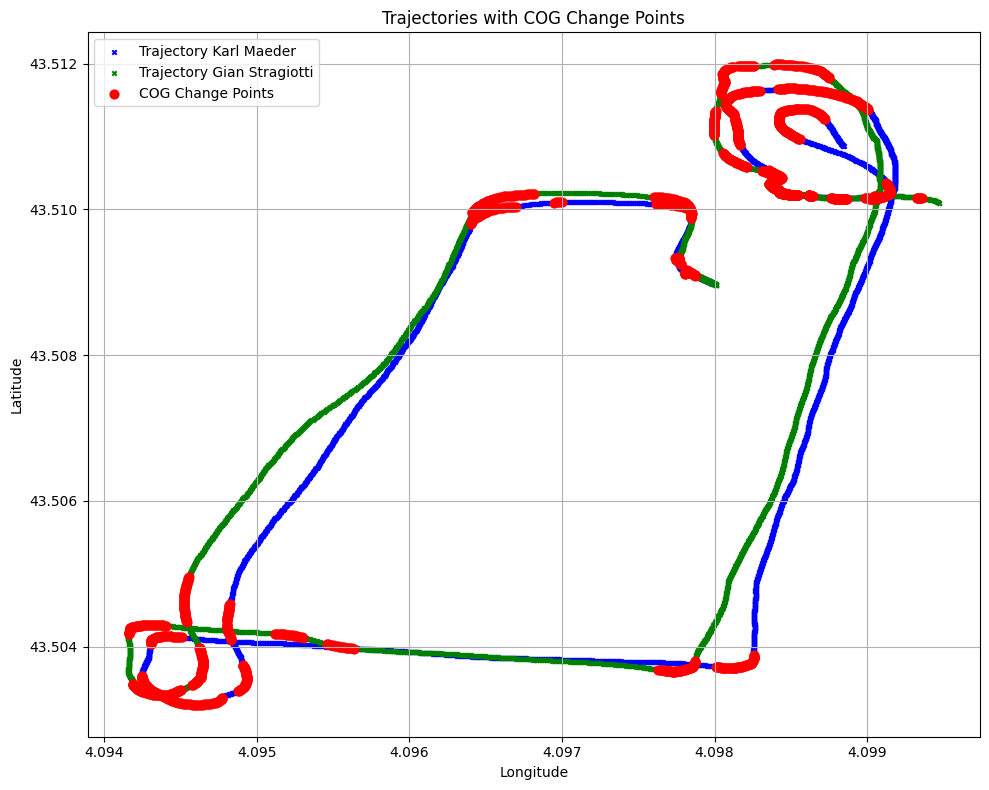

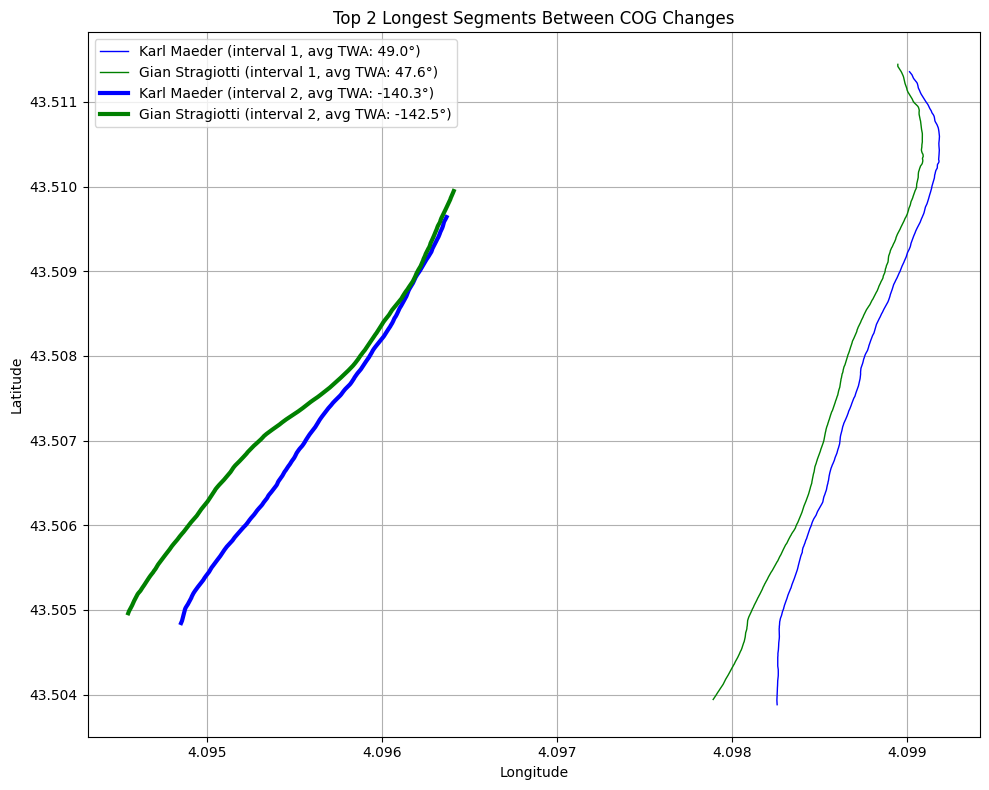

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\09_06\09_06_Run10


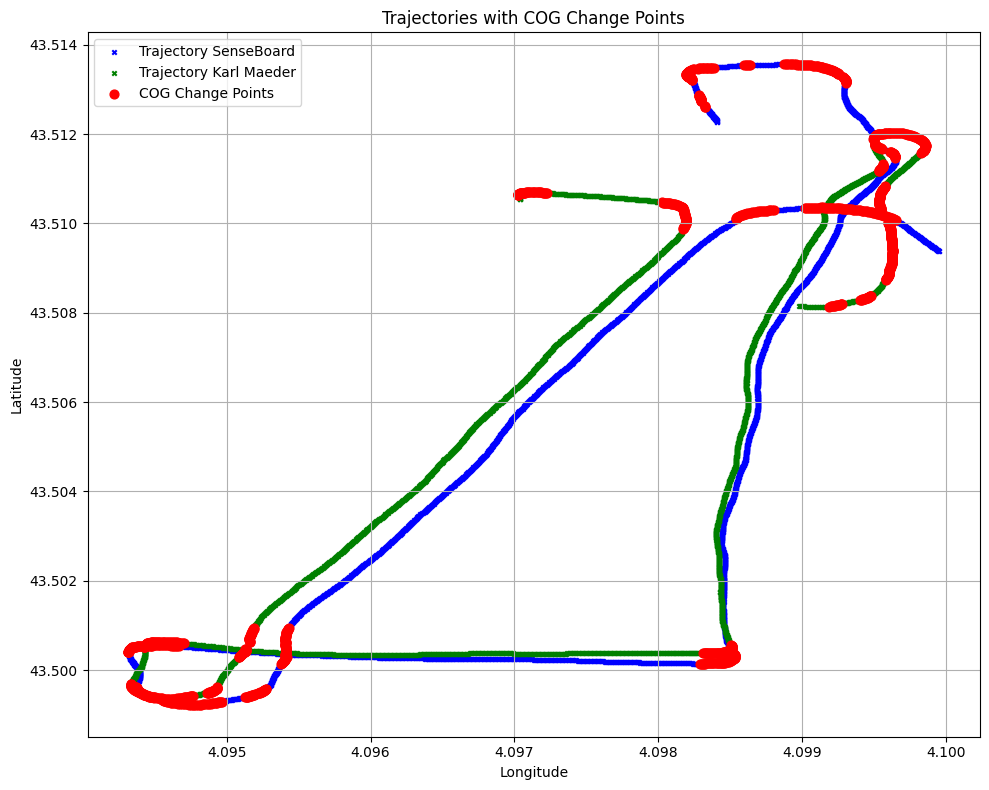

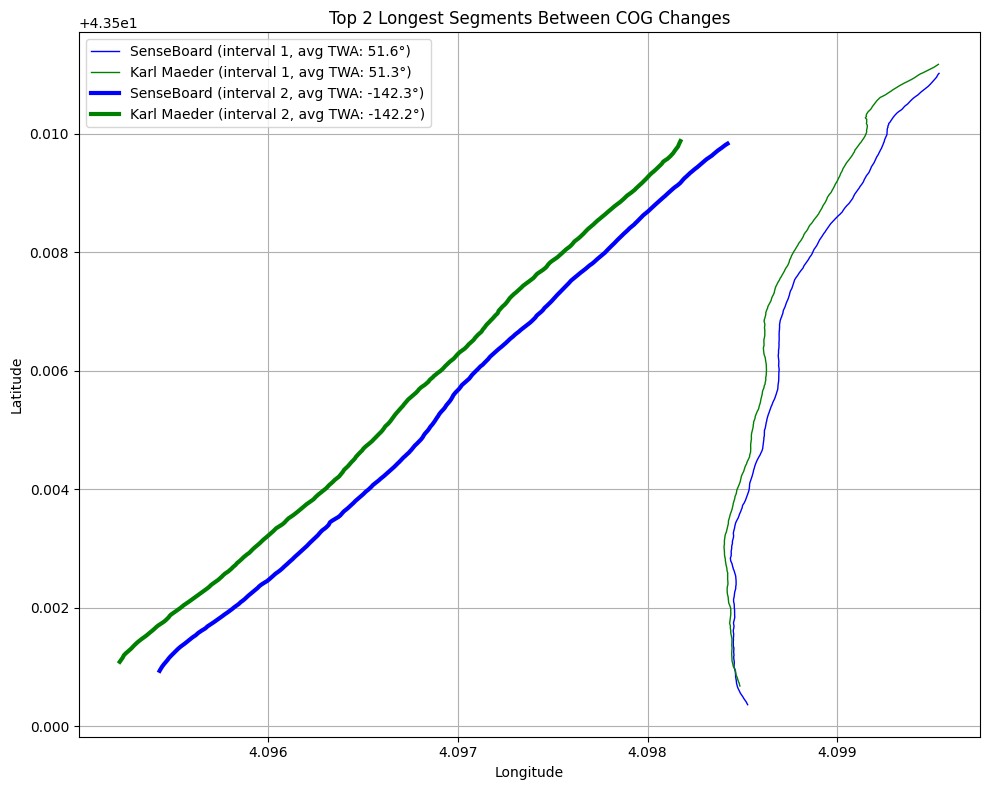

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\09_06\09_06_Run11


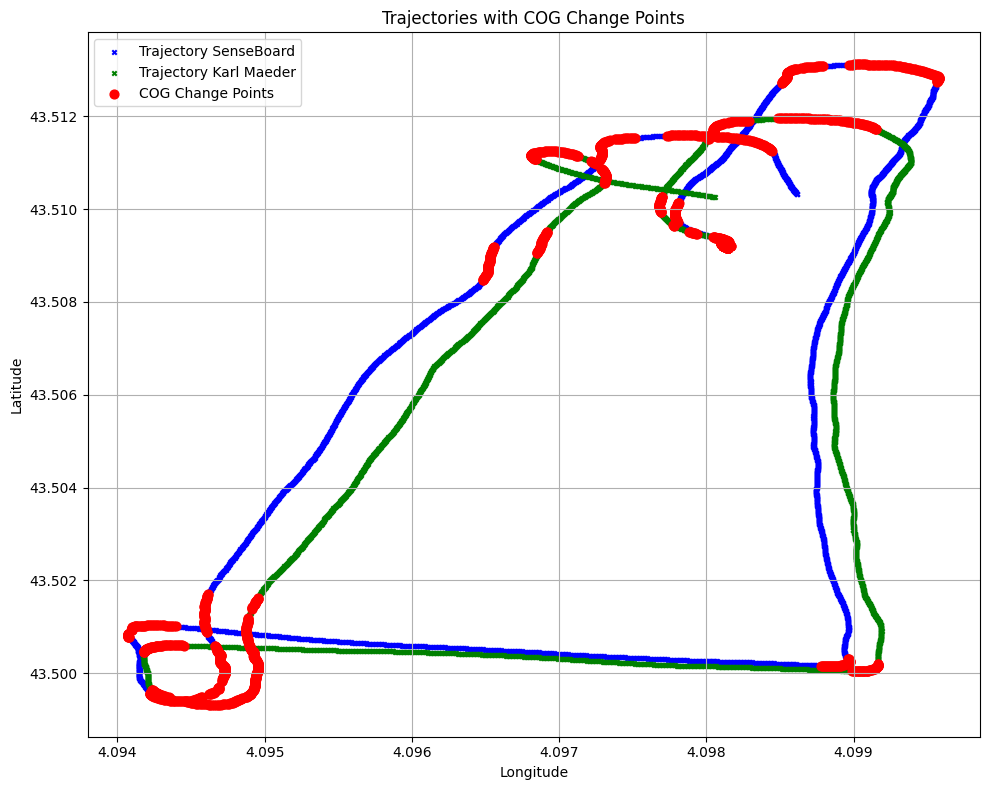

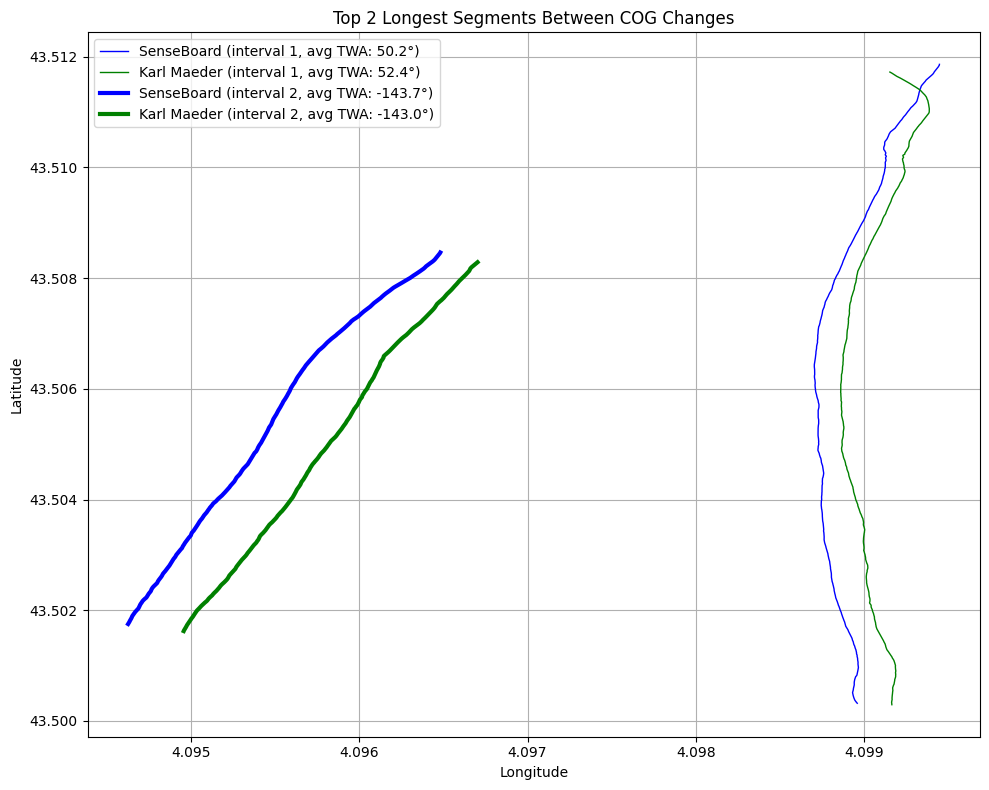

Analyse: Gian Stragiotti.csv et Karl Maeder.csv dans ../Data_Sailnjord/Straight_lines\09_06\09_06_Run2


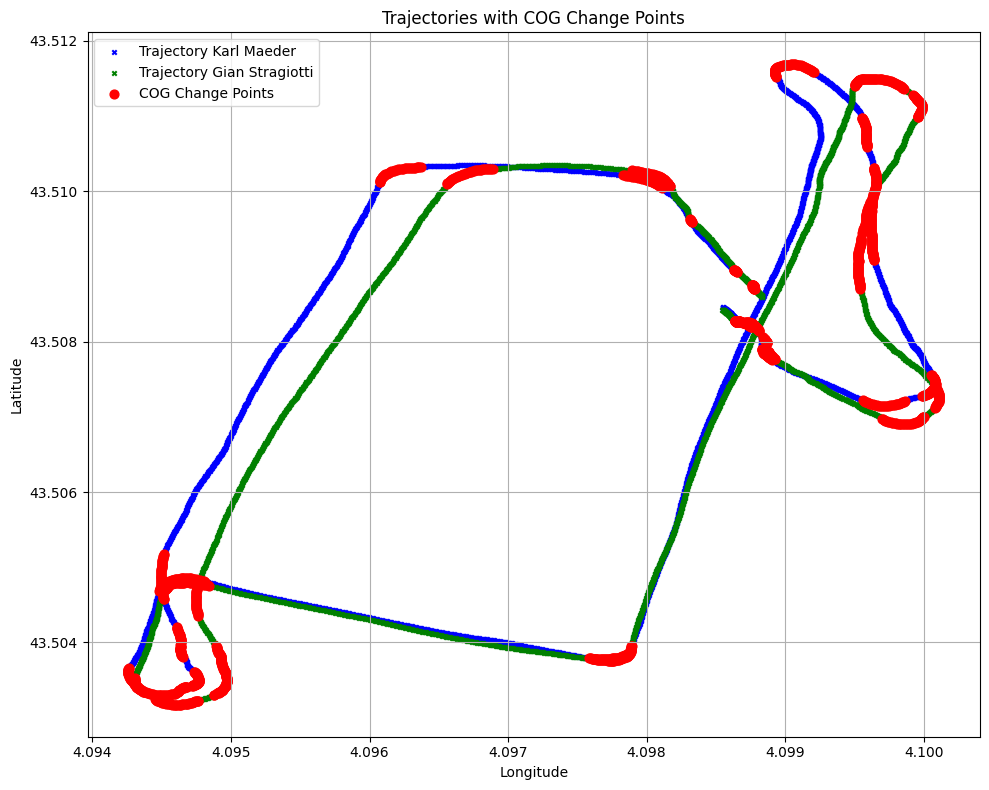

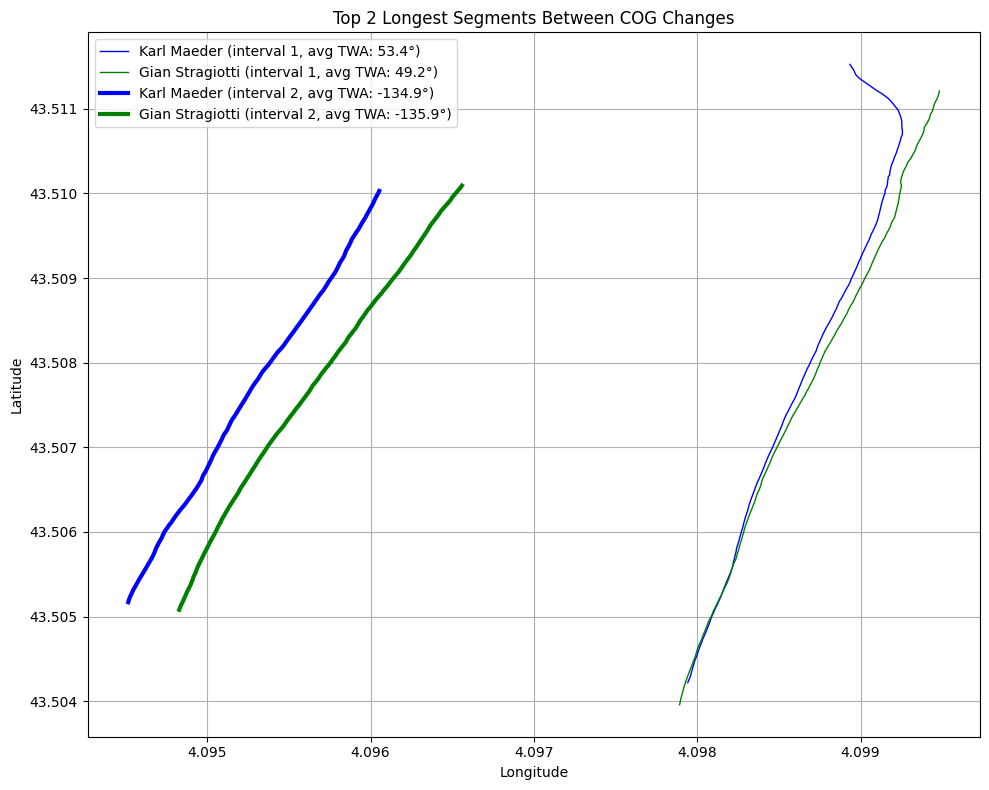

Ignoré: ../Data_Sailnjord/Straight_lines\09_06\09_06_Run3 (attendu 2 CSV, trouvé 1)
Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\09_06\09_06_Run4


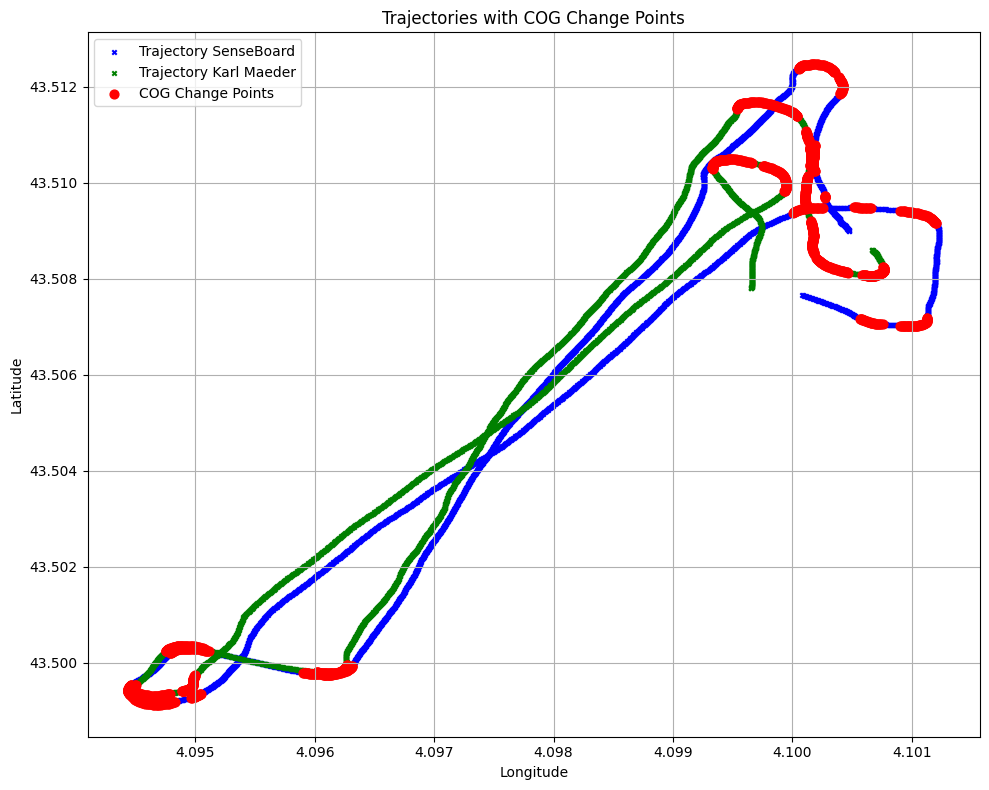

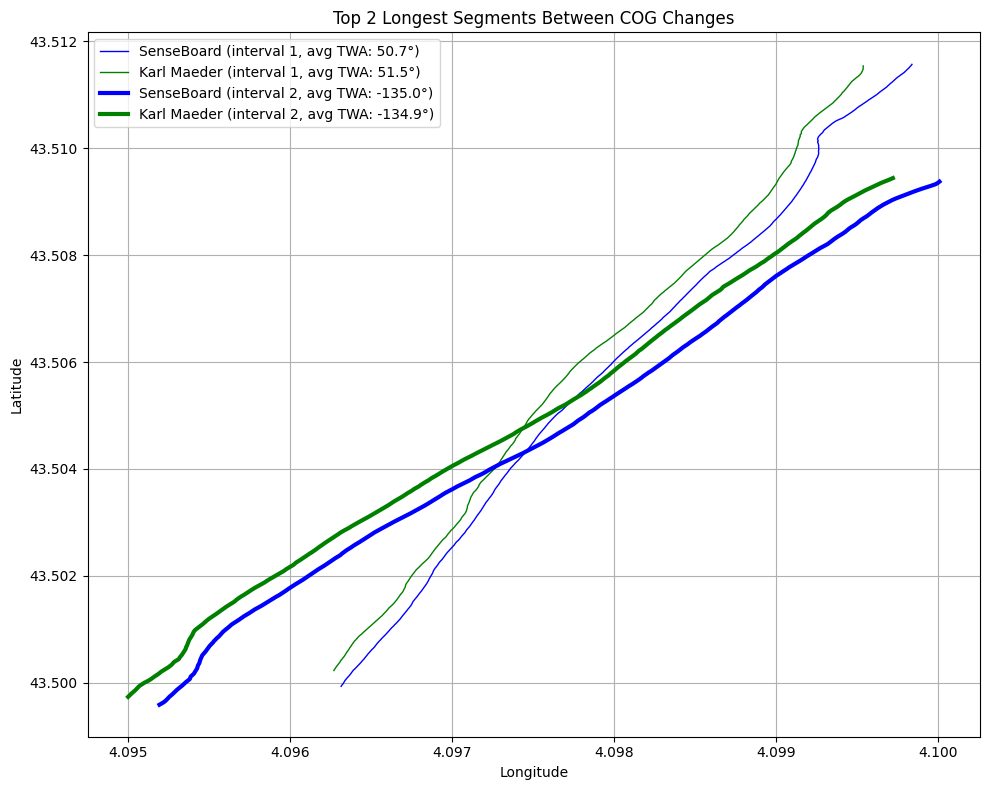

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\09_06\09_06_Run5


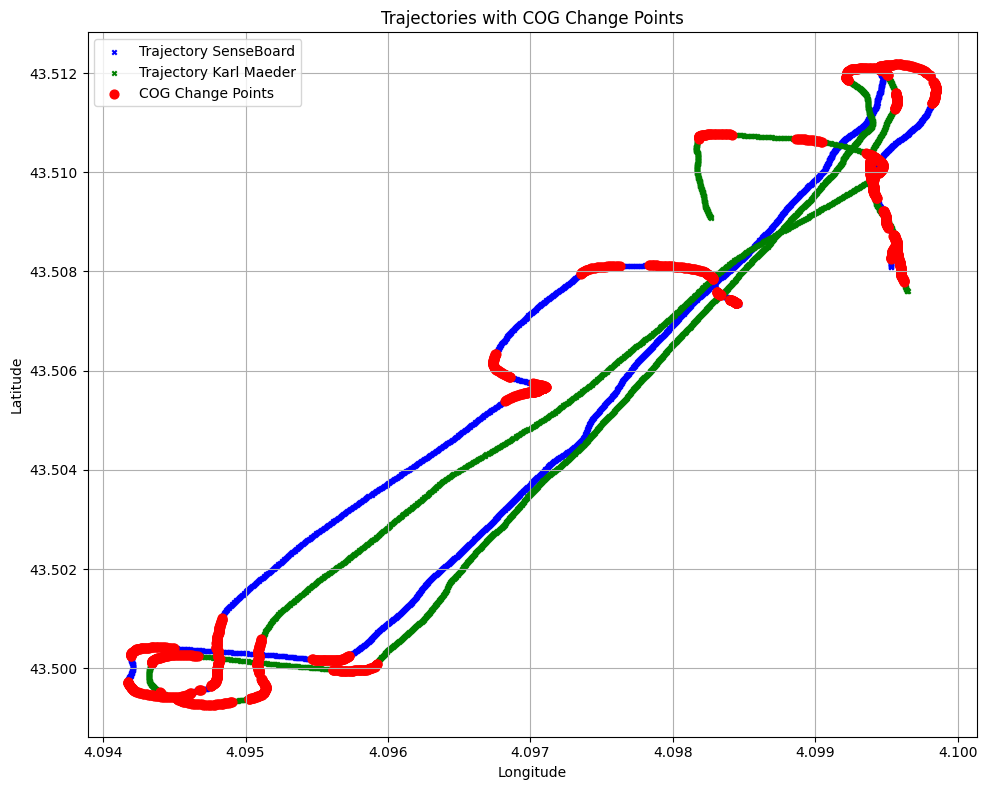

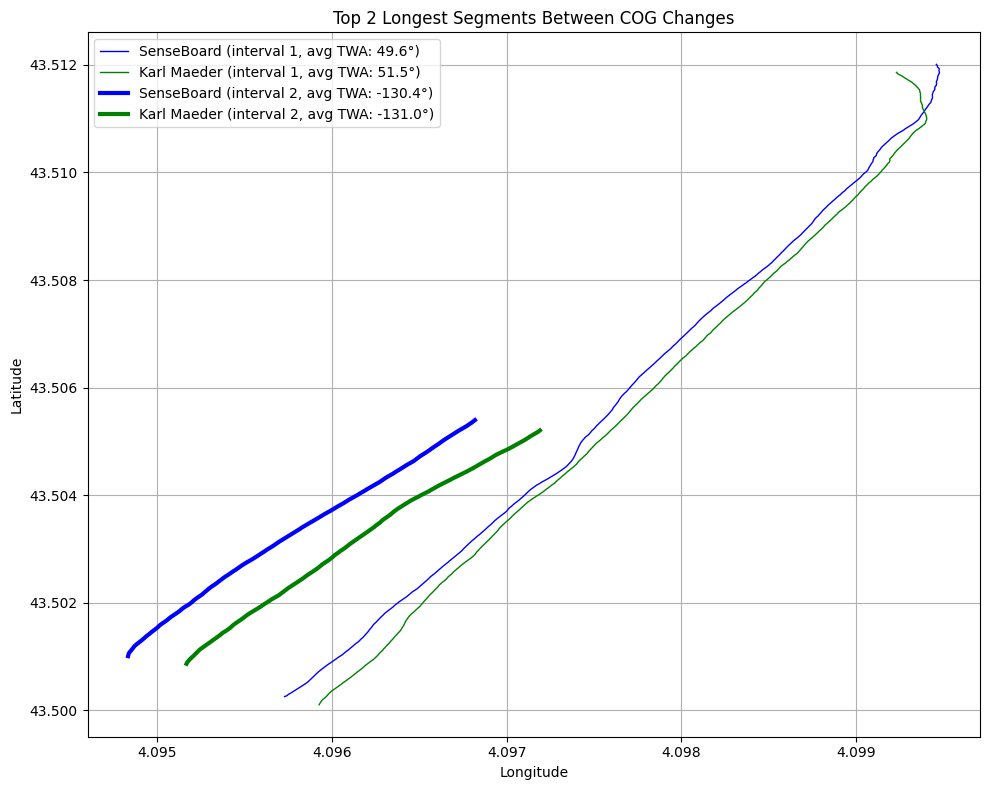

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\09_06\09_06_Run6


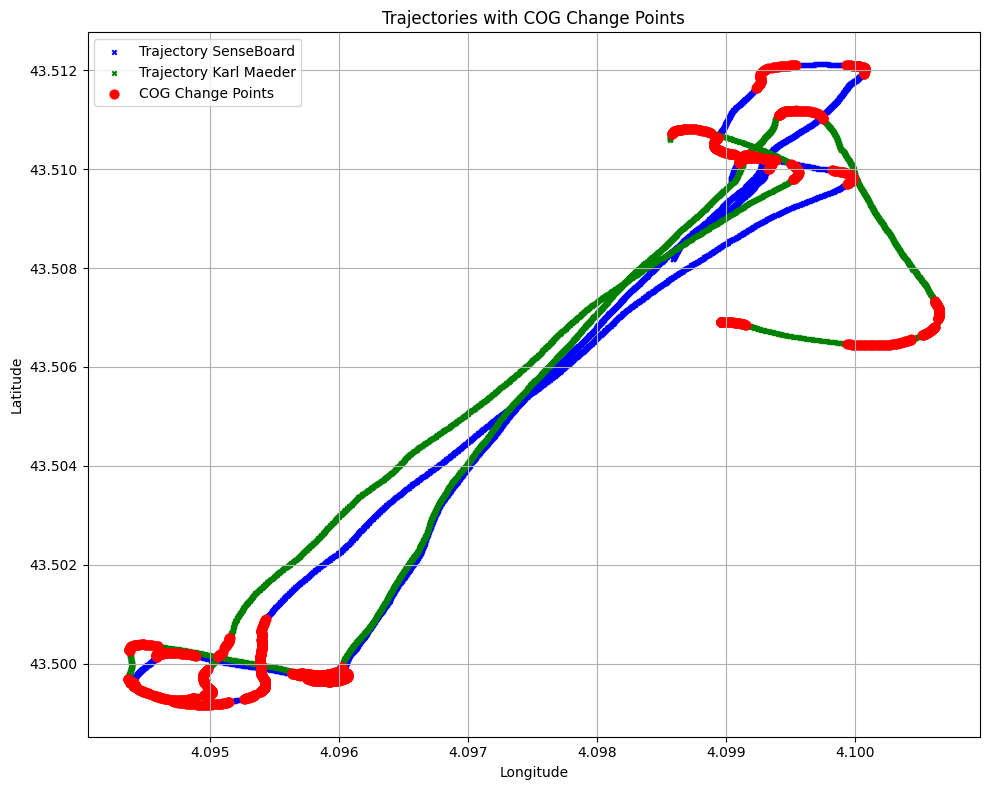

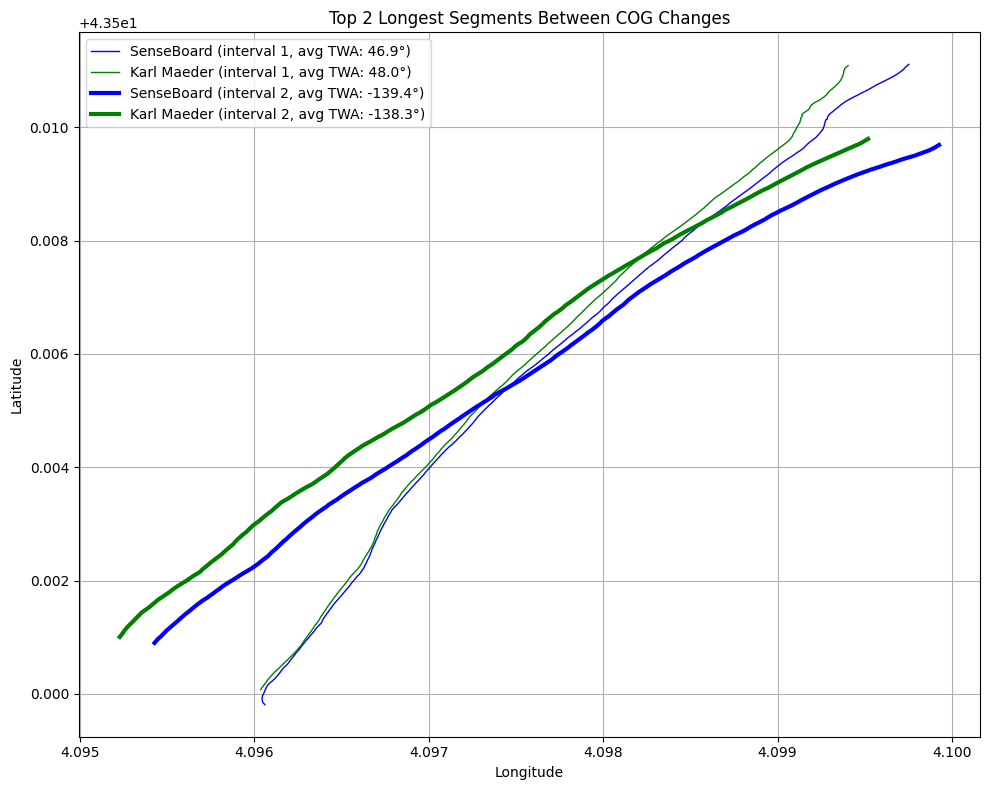

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\09_06\09_06_Run7


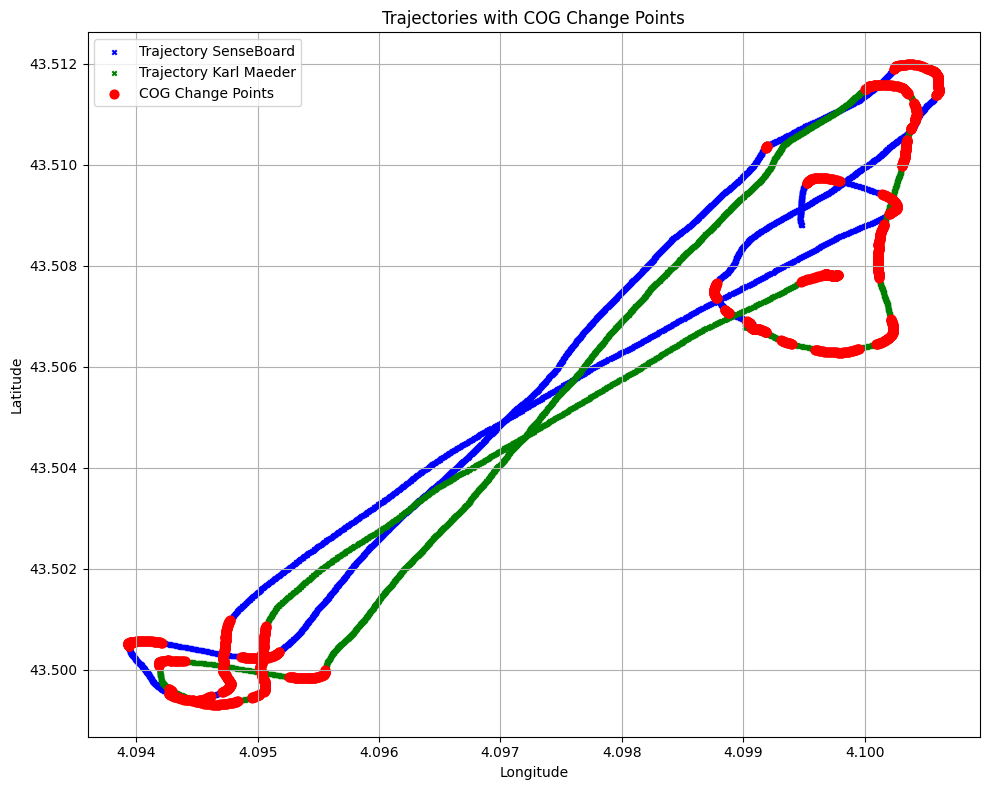

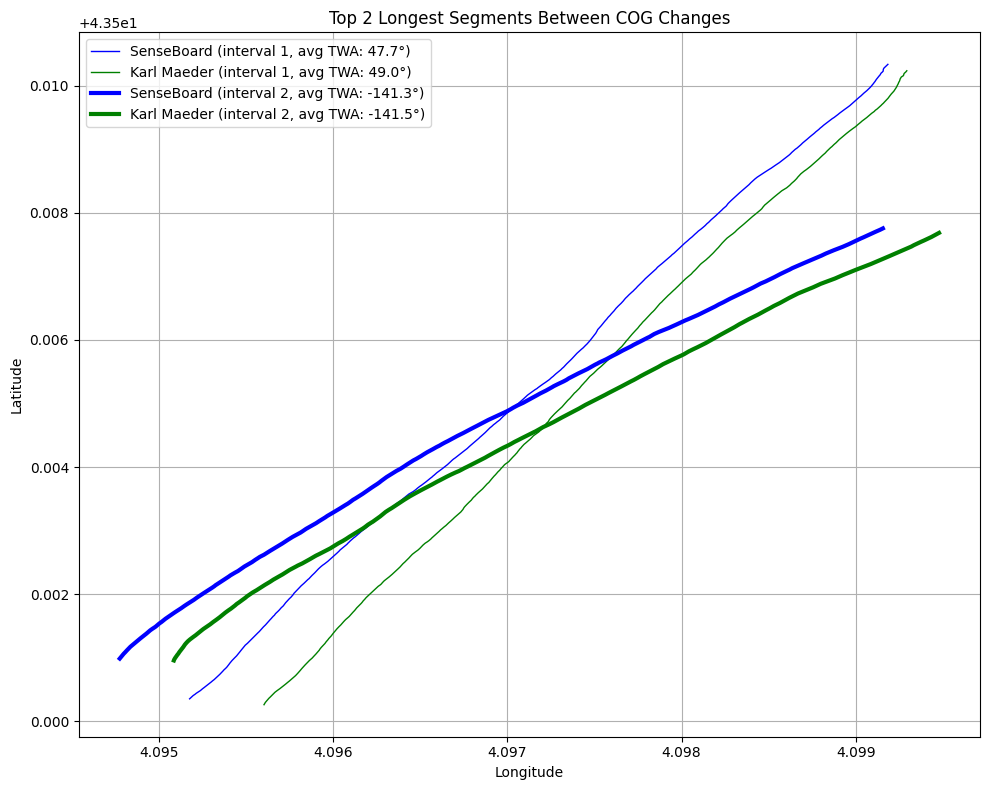

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\09_06\09_06_Run8


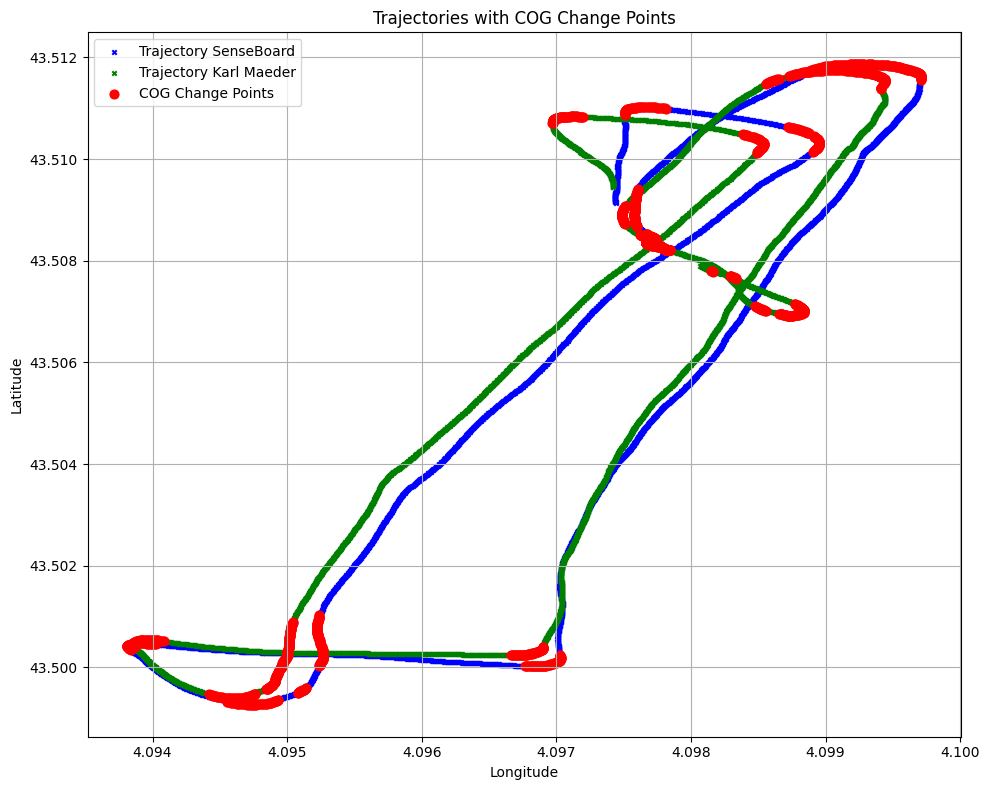

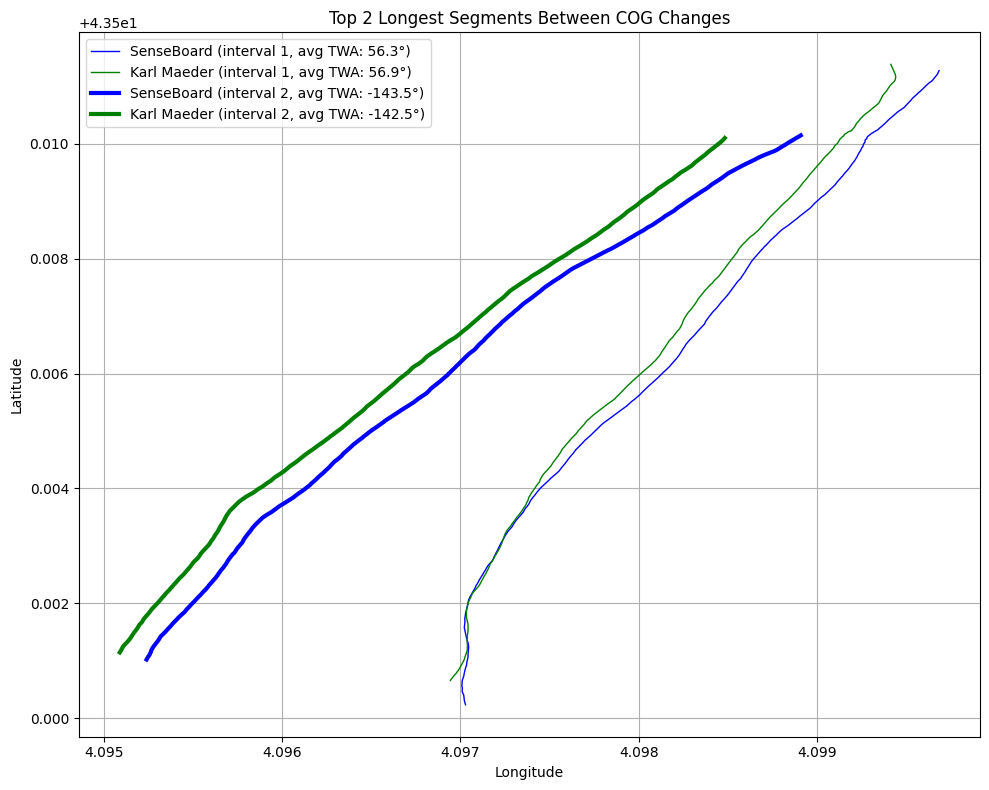

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\09_06\09_06_Run9


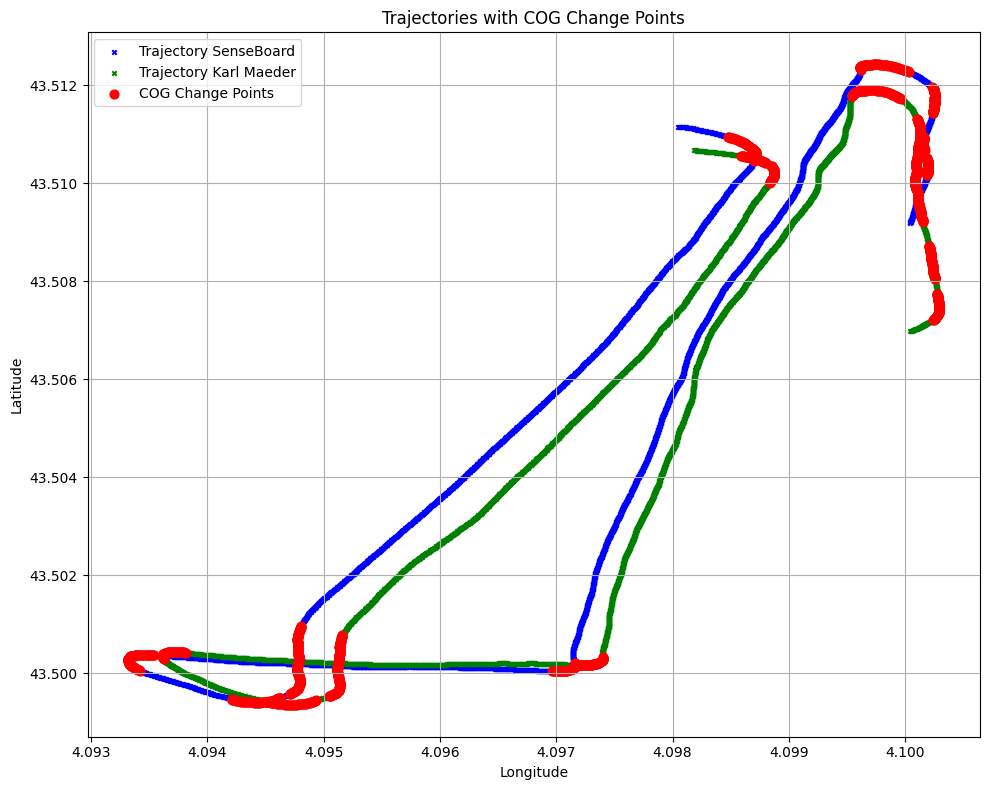

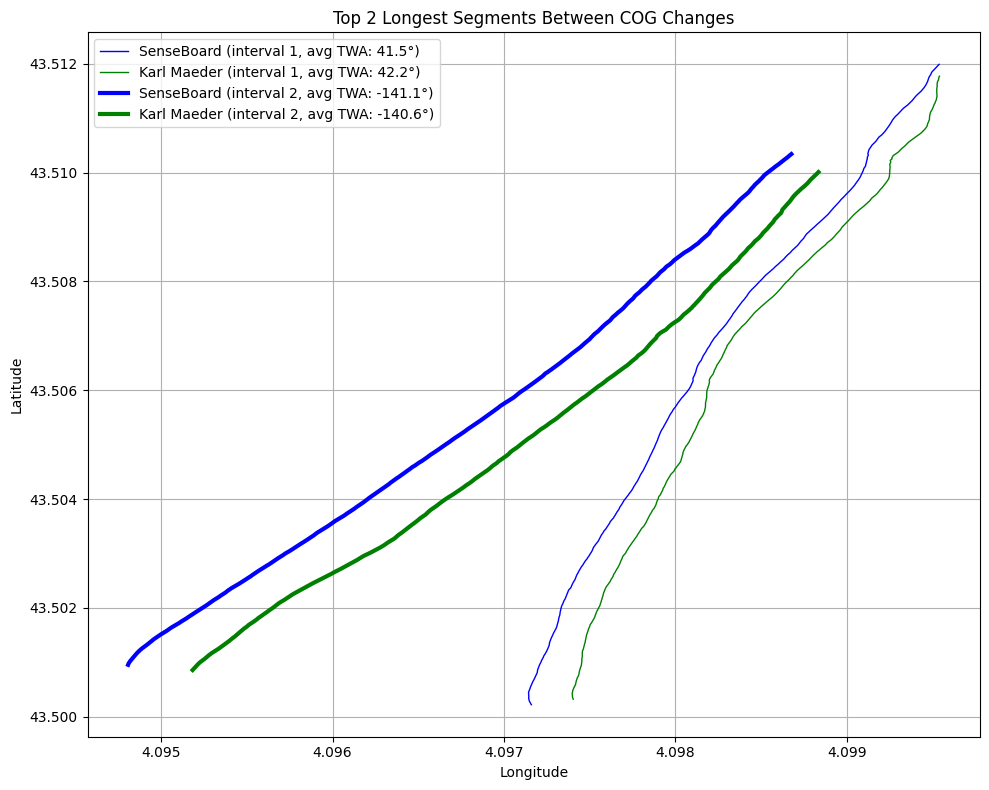

Analyse: Gian Stragiotti.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\10_06\10_06_Run1


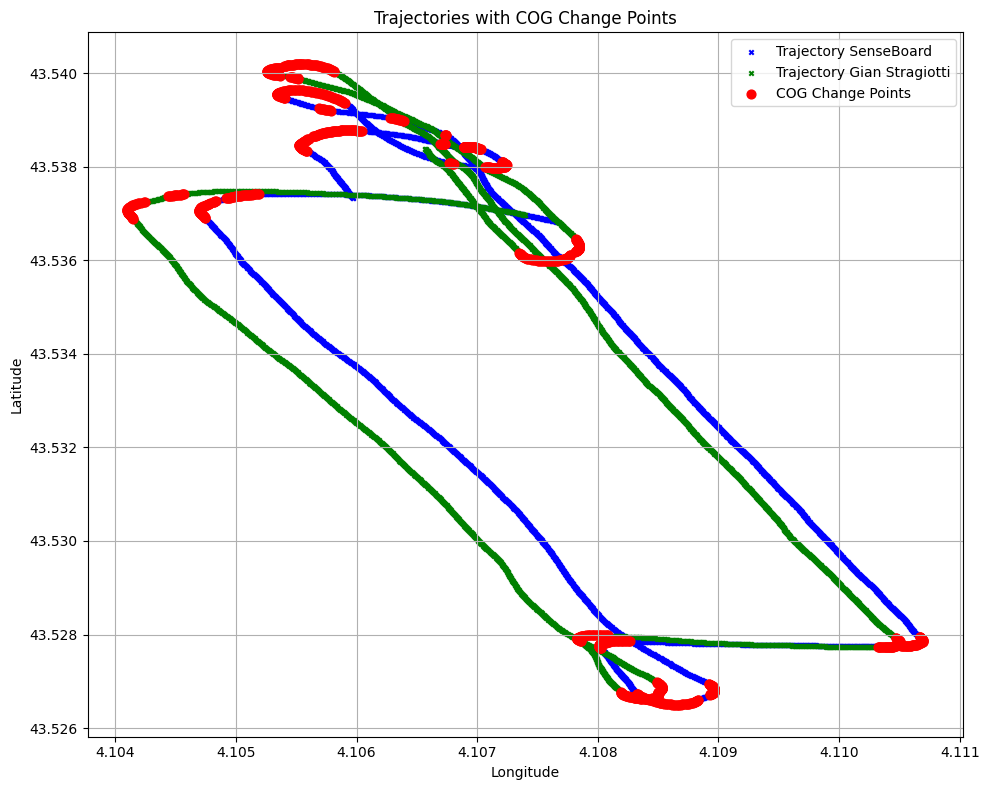

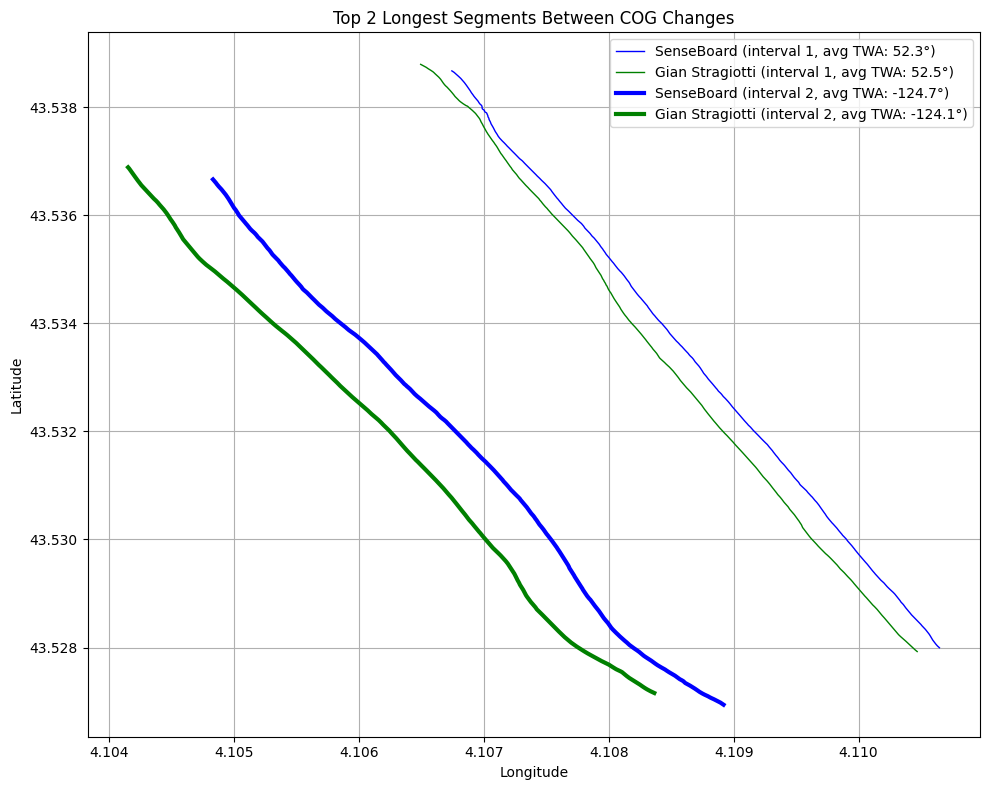

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\10_06\10_06_Run10


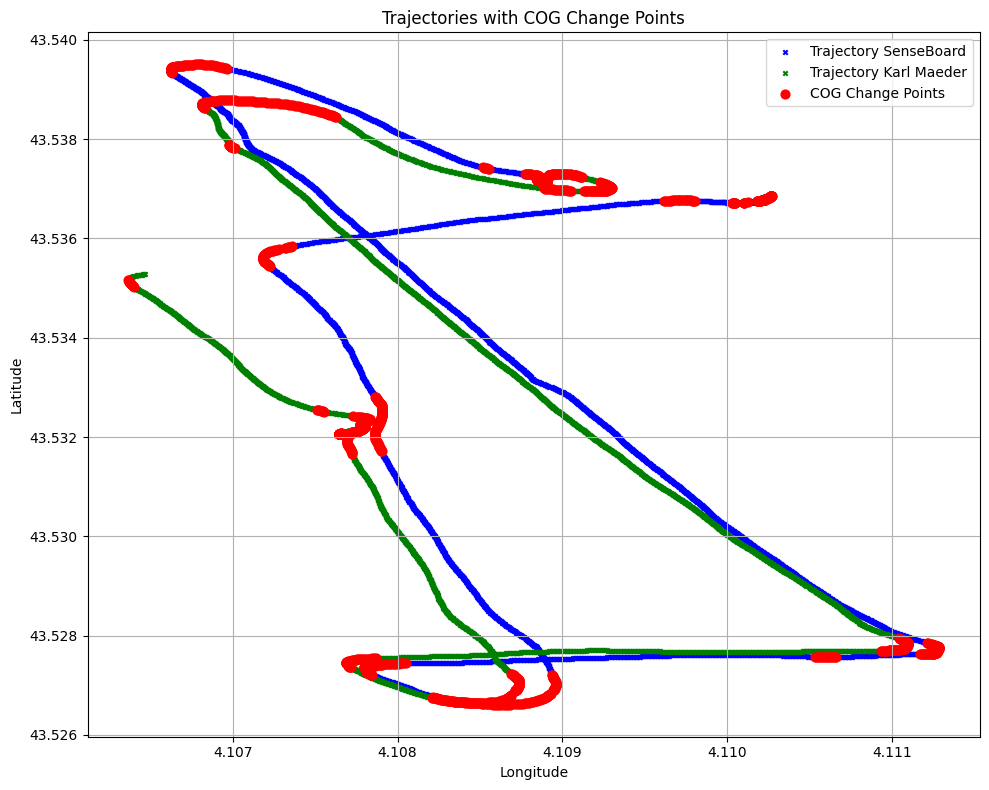

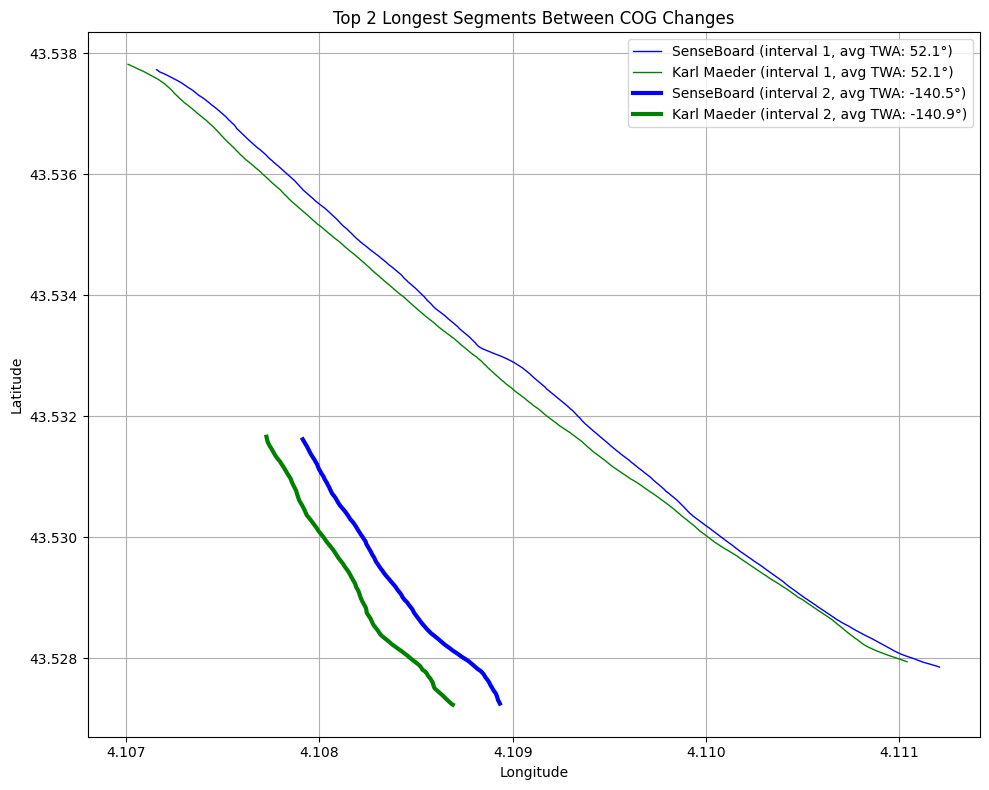

Analyse: Gian Stragiotti.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\10_06\10_06_Run2


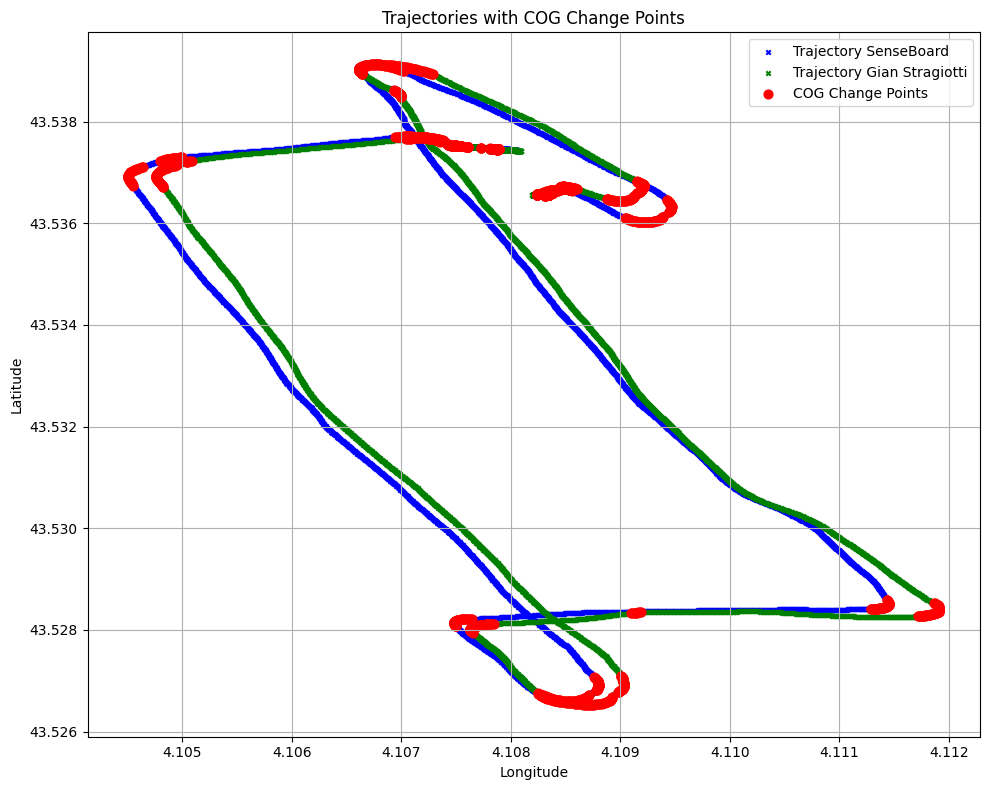

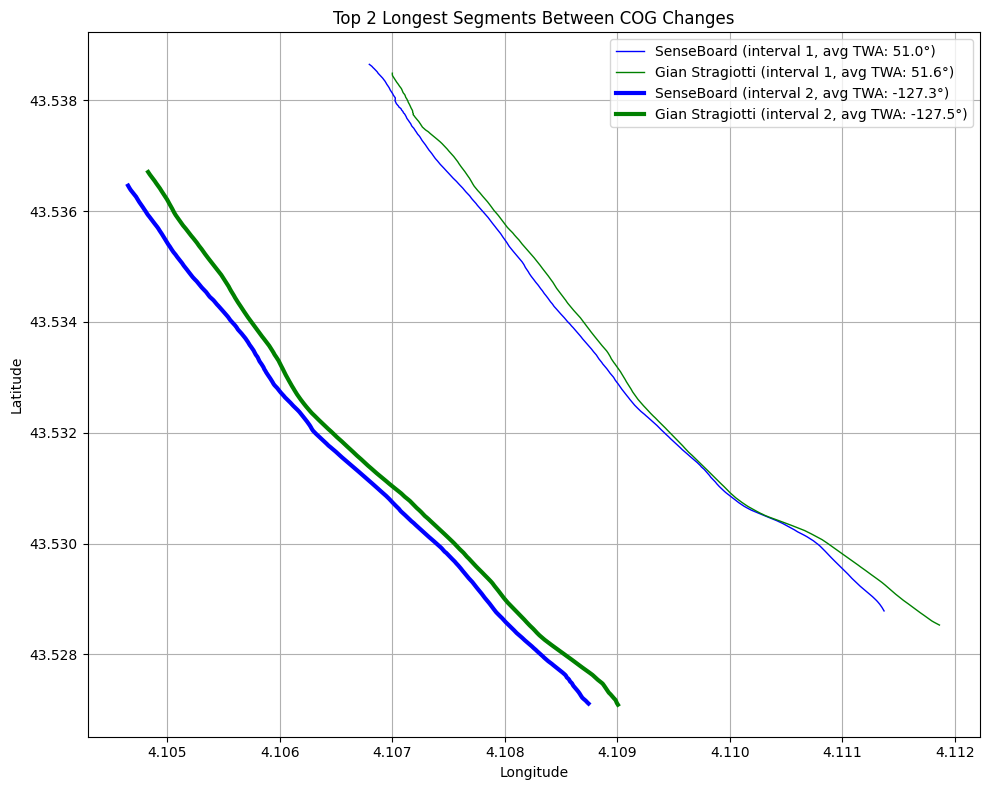

Analyse: Gian Stragiotti.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\10_06\10_06_Run3


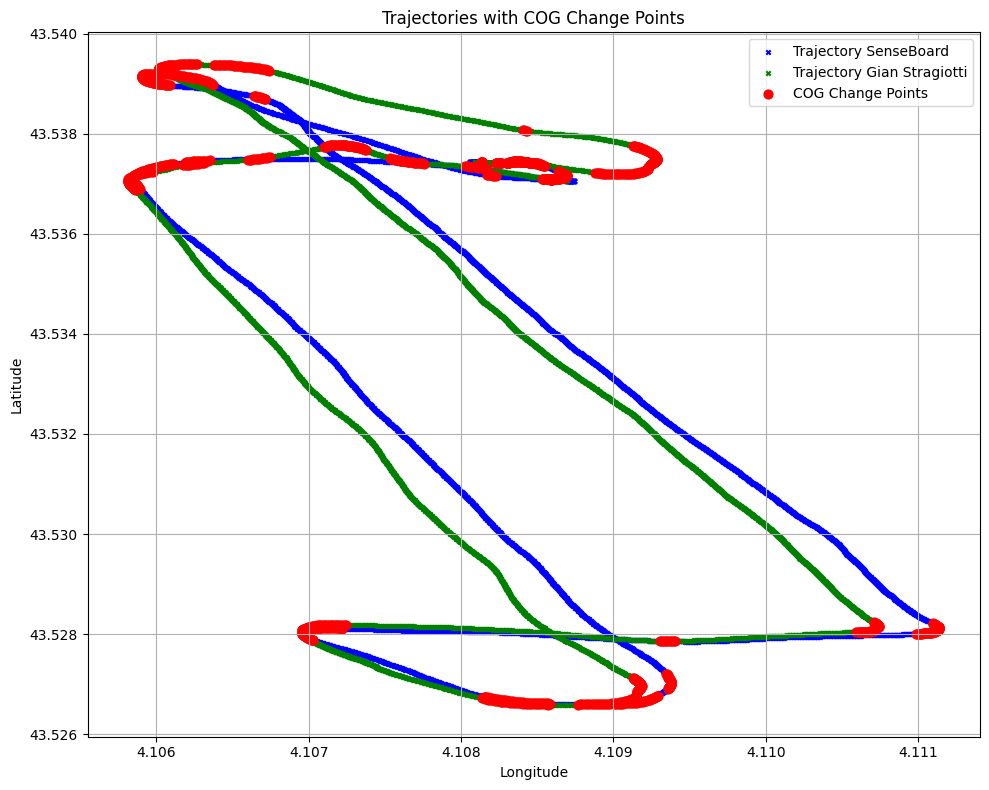

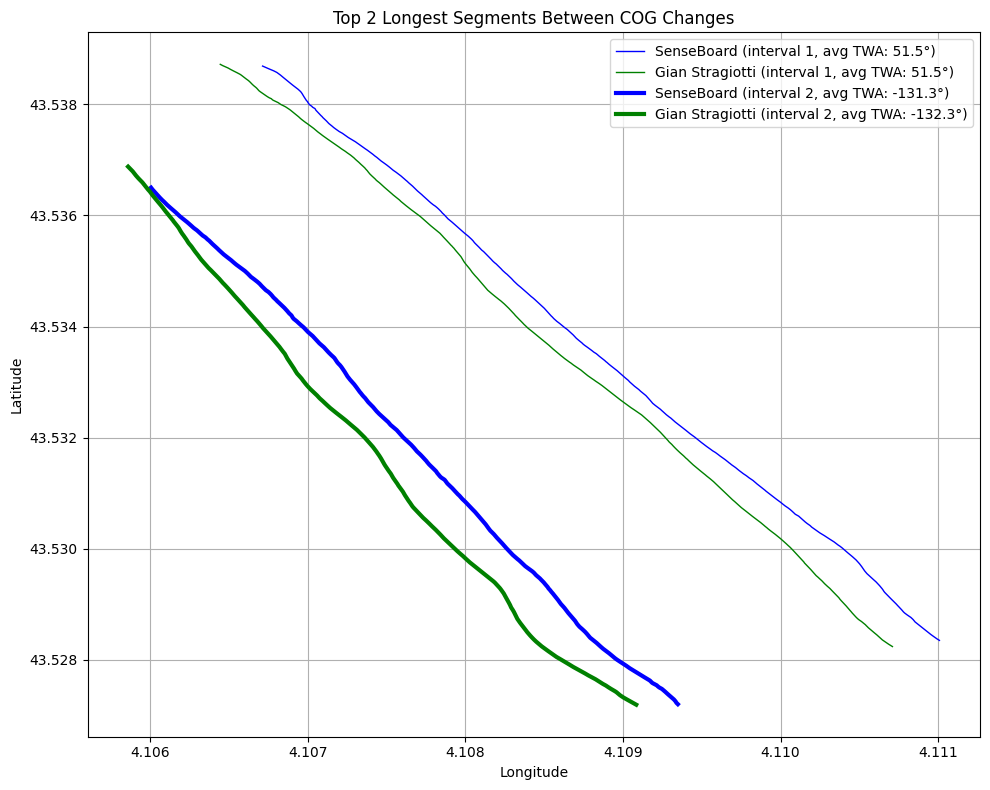

Analyse: Gian Stragiotti.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\10_06\10_06_Run4


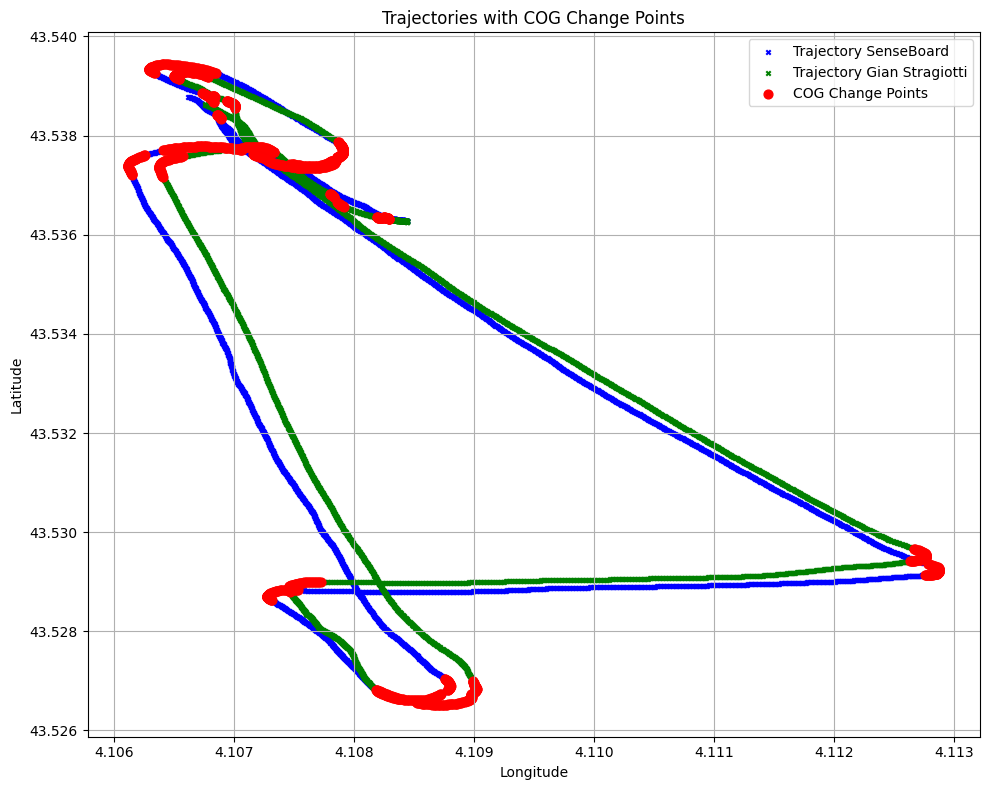

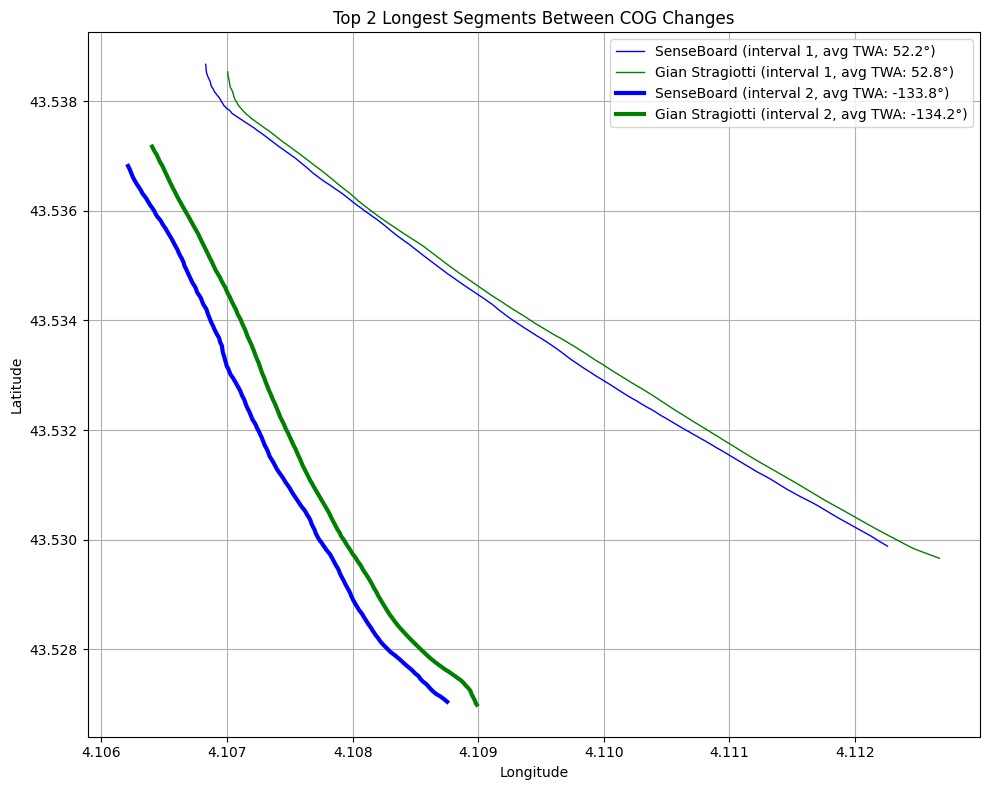

Analyse: Gian Stragiotti.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\10_06\10_06_Run5


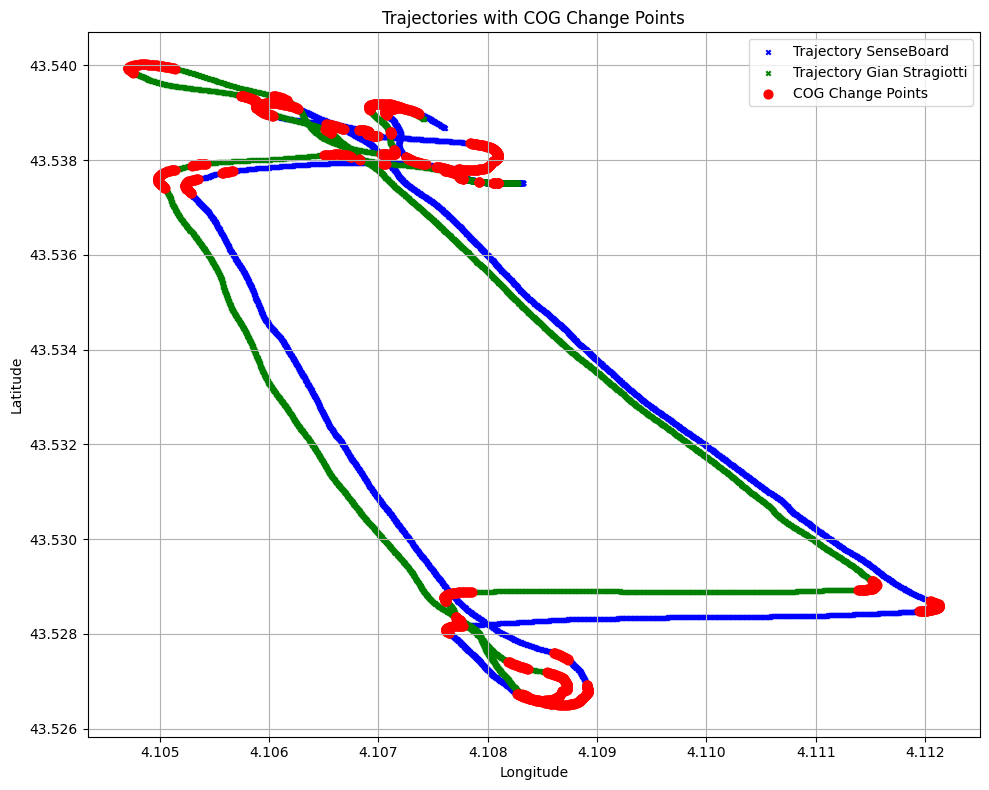

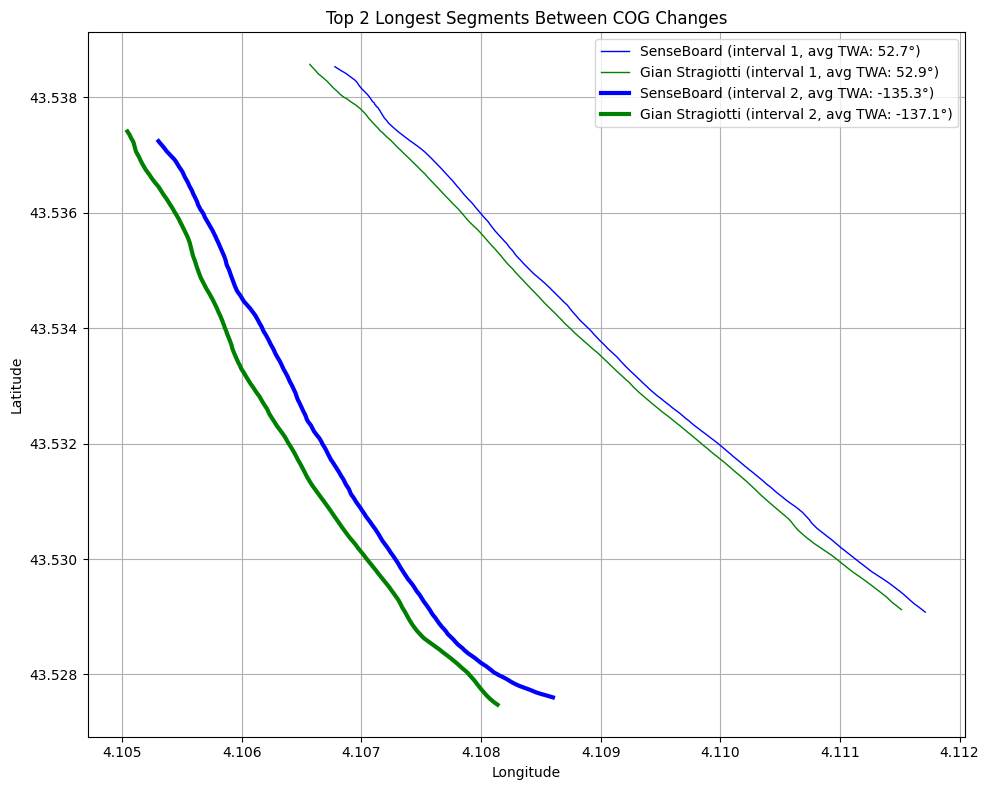

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\10_06\10_06_Run6


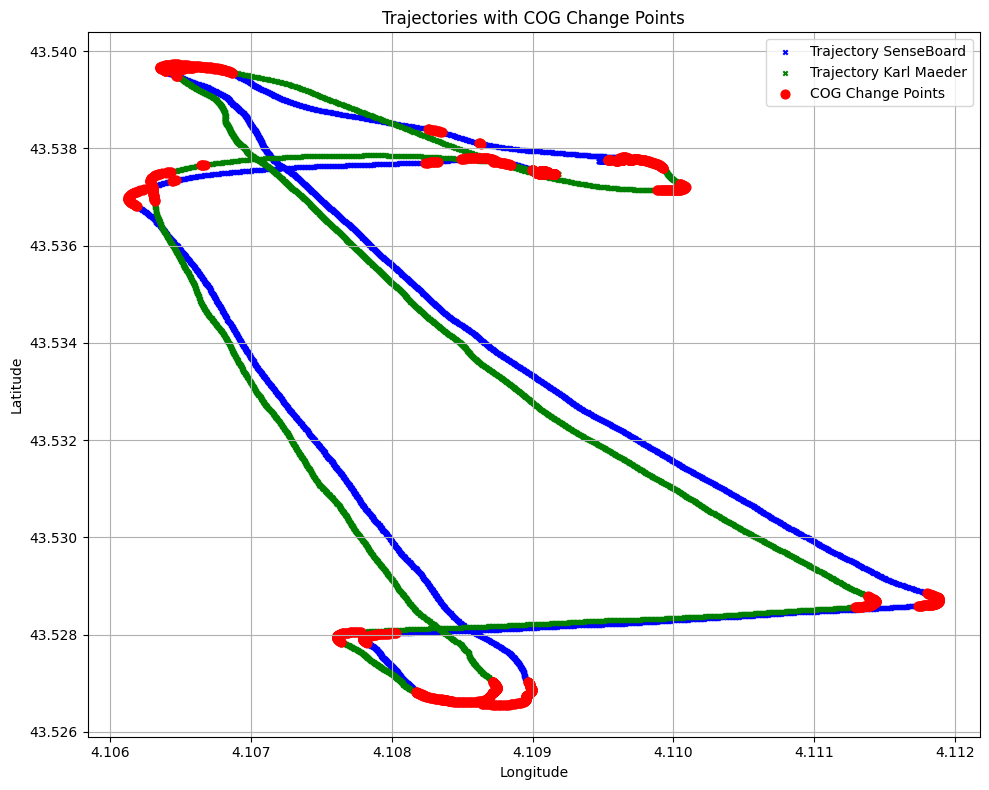

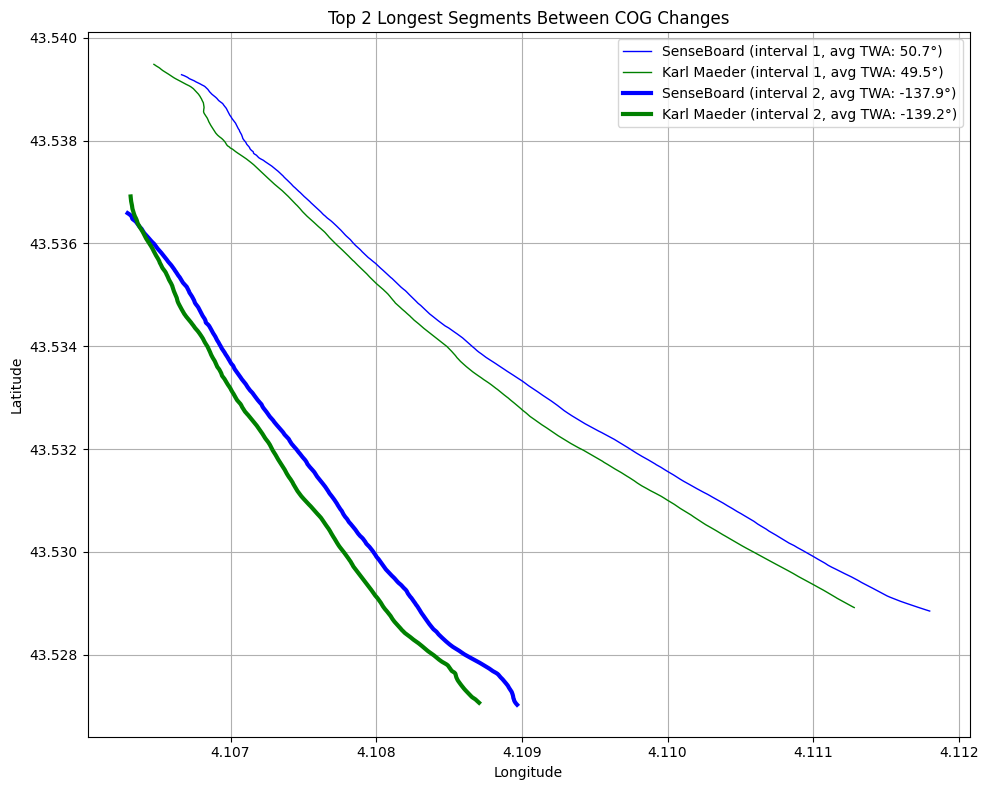

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\10_06\10_06_Run7


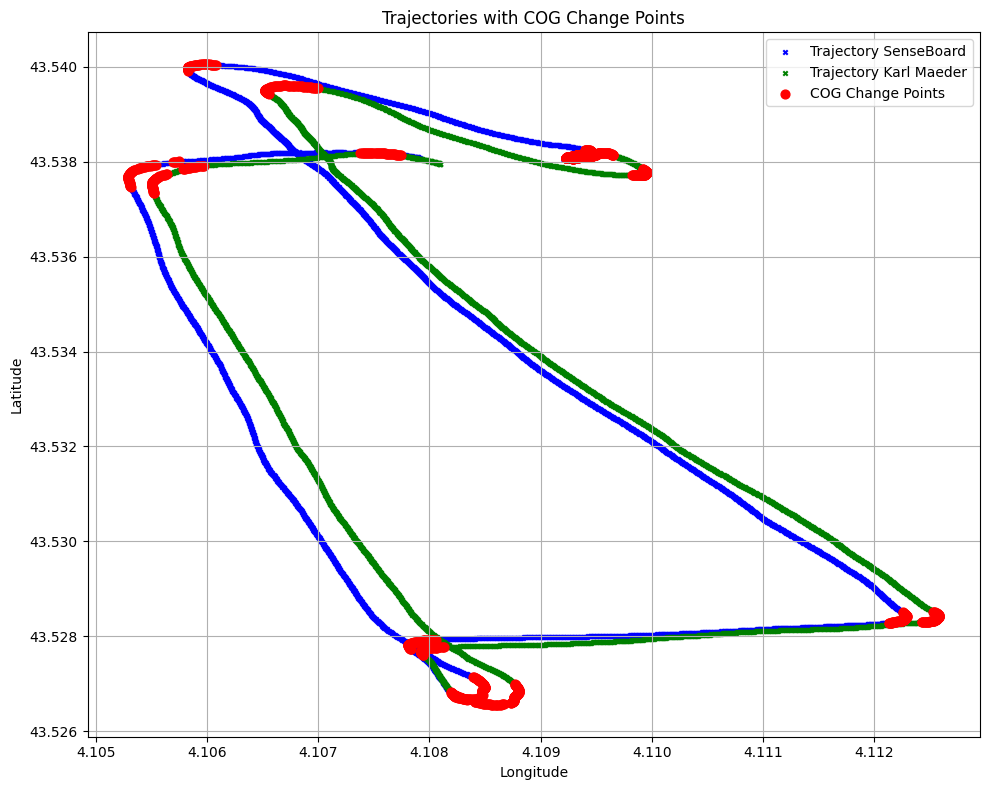

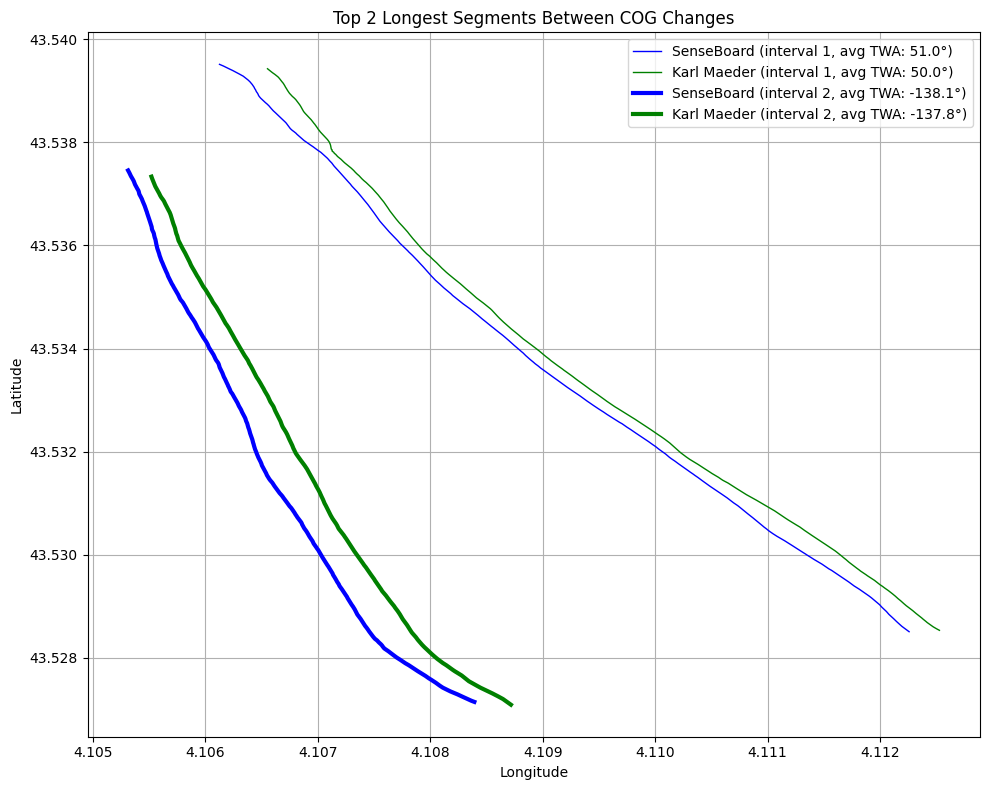

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\10_06\10_06_Run8


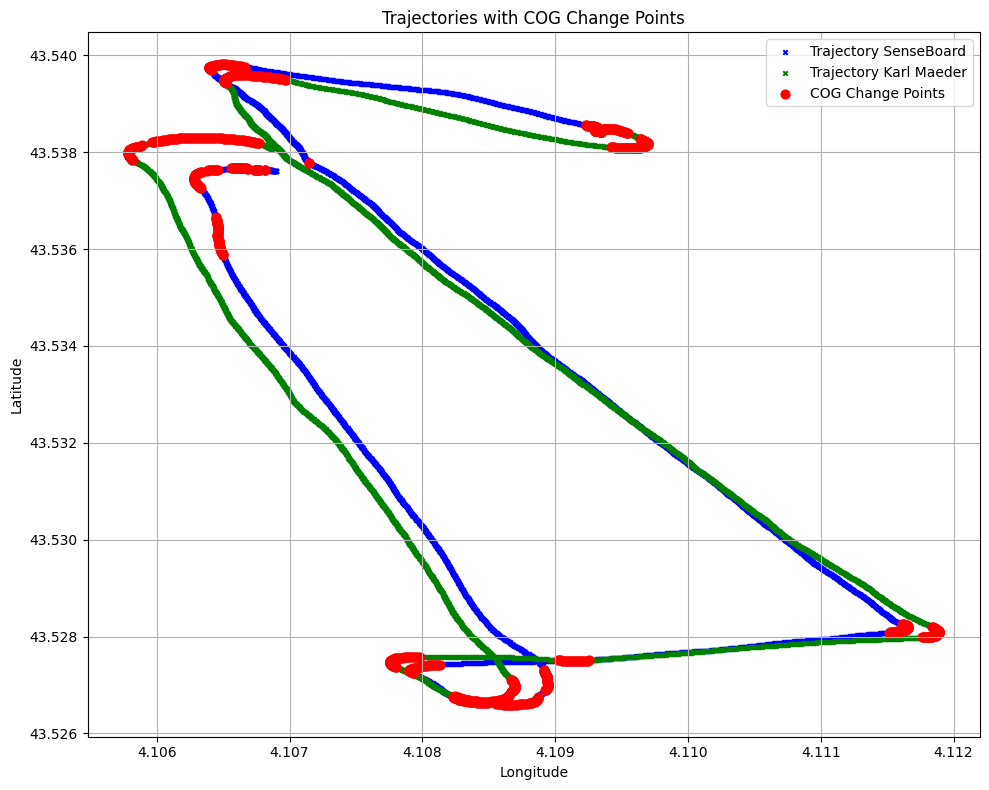

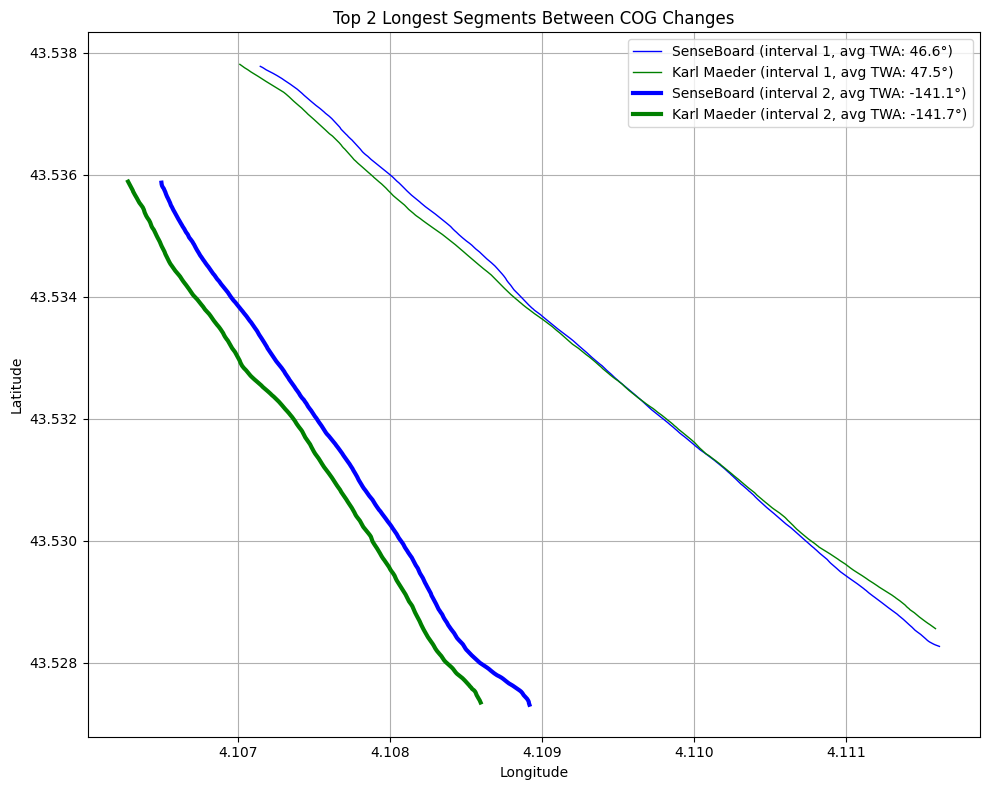

Analyse: Karl Maeder.csv et SenseBoard.csv dans ../Data_Sailnjord/Straight_lines\10_06\10_06_Run9


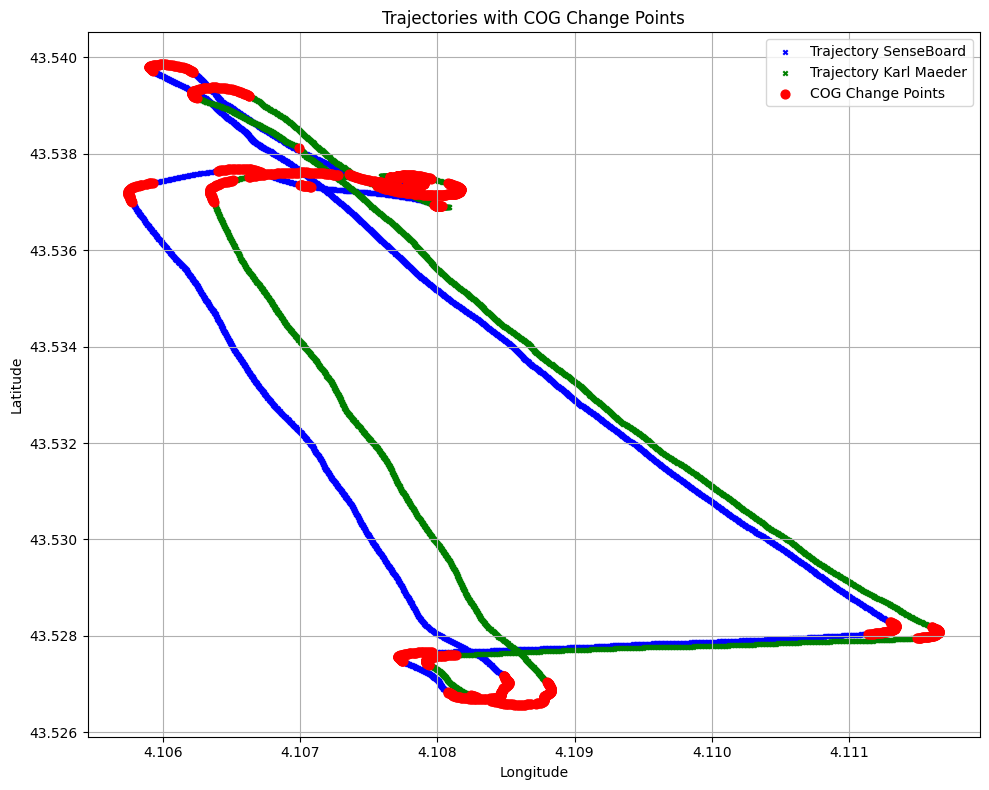

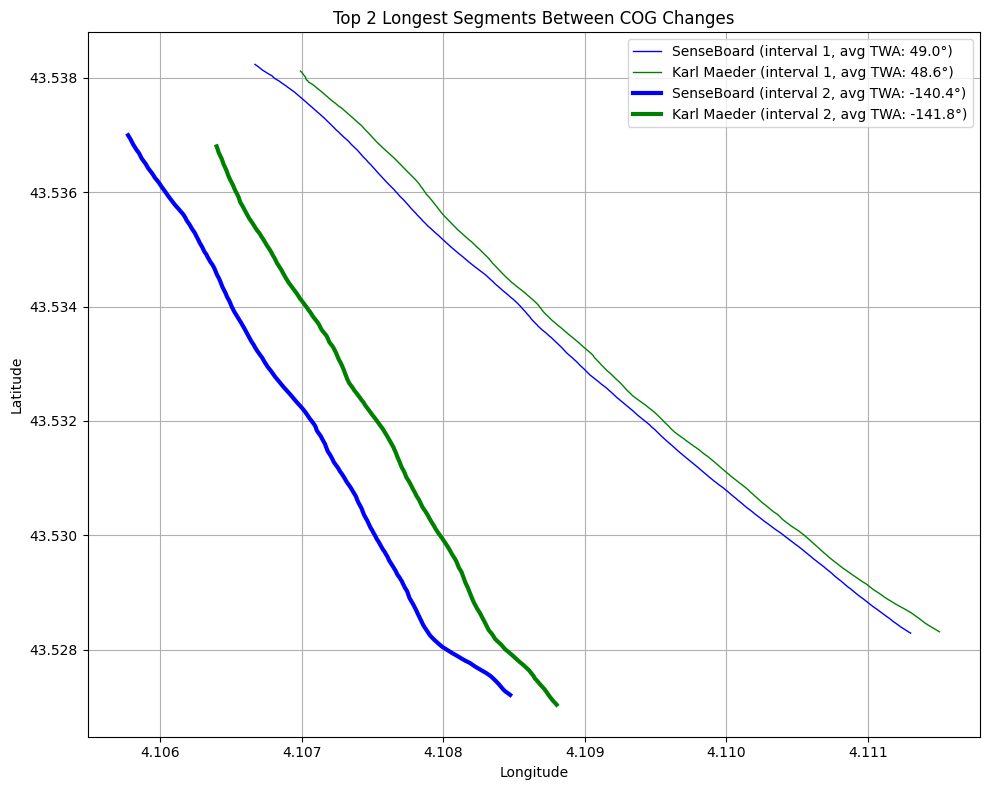

Résumé complet sauvegardé (38 runs)


In [1]:
import os
import json
from cog_analysis import analyze_session

summary = []

base_dir = "../Data_Sailnjord/Straight_lines"

# Scan de tous les dossiers de date
for date_folder in sorted(os.listdir(base_dir)):
    date_path = os.path.join(base_dir, date_folder)

    # Scan de tous les runs dans chaque dossier de date
    for run_folder in sorted(os.listdir(date_path)):
        run_path = os.path.join(date_path, run_folder)

        # Cherche 2 fichiers .csv
        csv_files = [f for f in os.listdir(run_path) if f.endswith(".csv")]
        if len(csv_files) != 2:
            print(f"Ignoré: {run_path} (attendu 2 CSV, trouvé {len(csv_files)})")
            continue
        csv_paths = [os.path.join(run_path, f) for f in csv_files]
        print(f"Analyse: {csv_files[0]} et {csv_files[1]} dans {run_path}")
        try:
            longest_intervals = analyze_session(csv_paths[0], csv_paths[1])
            summary.append({
                "run": run_folder,
                "intervals": longest_intervals
            })
        except Exception as e:
            print(f"Erreur dans {run_path} : {e}")

# Sauvegarde du résumé (tout est reconstruit à chaque fois)
summary_file = "summary.json"
with open(summary_file, "w") as f:
    json.dump(summary, f, indent=2)

print(f"Résumé complet sauvegardé ({len(summary)} runs)")


In [2]:
print(json.dumps(summary, indent=2))

[
  {
    "run": "06_06_Run1",
    "intervals": [
      {
        "start_time": 1749217659.658,
        "end_time": 1749217788.157,
        "duration": 128.49900007247925,
        "boat1_name": "Gian Stragiotti",
        "boat2_name": "Karl Maeder",
        "avg TWA boat1": 50.416486381322954,
        "avg TWA boat2": 50.261098054474715
      },
      {
        "start_time": 1749217876.851,
        "end_time": 1749217975.959,
        "duration": 99.10800004005432,
        "boat1_name": "Gian Stragiotti",
        "boat2_name": "Karl Maeder",
        "avg TWA boat1": -124.47529536290322,
        "avg TWA boat2": -119.59282862903227
      }
    ]
  },
  {
    "run": "06_06_Run2",
    "intervals": [
      {
        "start_time": 1749218365.759,
        "end_time": 1749218511.36,
        "duration": 145.60099983215332,
        "boat1_name": "Gian Stragiotti",
        "boat2_name": "Karl Maeder",
        "avg TWA boat1": 60.73500824175824,
        "avg TWA boat2": 63.516544955387786
      },